In [103]:
import pandas as pd

file_path = "/Users/asliozdemirstrollo/Documents/Documents/ML/Moosic Data 10 Songs/spotify_5000_songs.csv"

# 1) Read normally, then clean header names
songs_df = pd.read_csv(file_path)
songs_df.columns = songs_df.columns.str.strip()   # remove leading/trailing spaces in headers

# 2) Drop stray index column if present
if "Unnamed: 0" in songs_df.columns:
    songs_df = songs_df.drop(columns=["Unnamed: 0"])

# 3) Ensure the 'name' column exists after cleaning
if "name" not in songs_df.columns:
    raise KeyError(f"'name' column not found. Available columns: {list(songs_df.columns)}")

# 4) Set index to song name
songs_df = songs_df.set_index("name")

# 5) Drop unwanted columns (ignore if any are missing)
cols_to_drop = ["type", "id", "html", "key", "artist", "mode", "time_signature"]
songs_df = songs_df.drop(columns=[c for c in cols_to_drop if c in songs_df.columns], errors="ignore")

print(songs_df.head())
print("\nIndex name:", songs_df.index.name)

                                                    danceability  energy  \
name                                                                       
Se Eu Quiser Falar Com Deus                    ...         0.658  0.2590   
Saudade De Bahia                               ...         0.742  0.3990   
Canta Canta, Minha Gente                       ...         0.851  0.7300   
Mulher Eu Sei                                  ...         0.705  0.0502   
Rosa Morena                                    ...         0.651  0.1190   

                                                    loudness  speechiness  \
name                                                                        
Se Eu Quiser Falar Com Deus                    ...   -13.141       0.0705   
Saudade De Bahia                               ...   -12.646       0.0346   
Canta Canta, Minha Gente                       ...   -11.048       0.3470   
Mulher Eu Sei                                  ...   -18.115       0.0471   
Rosa 

In [104]:

print(songs_df.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [105]:
songs_df.head()

danceability  energy  \
name                                                                       
Se Eu Quiser Falar Com Deus                    ...         0.658  0.2590   
Saudade De Bahia                               ...         0.742  0.3990   
Canta Canta, Minha Gente                       ...         0.851  0.7300   
Mulher Eu Sei                                  ...         0.705  0.0502   
Rosa Morena                                    ...         0.651  0.1190   

                                                    loudness  speechiness  \
name                                                                        
Se Eu Quiser Falar Com Deus                    ...   -13.141       0.0705   
Saudade De Bahia                               ...   -12.646       0.0346   
Canta Canta, Minha Gente                       ...   -11.048       0.3470   
Mulher Eu Sei                                  ...   -18.115       0.0471   
Rosa Morena                                    ...   -19.807       0.0380   

                                                    acousticness  \
name                                                               
Se Eu Quiser Falar Com Deus                    ...         0.694   
Saudade De Bahia                               ...         0.217   
Canta Canta, Minha Gente                       ...         0.453   
Mulher Eu Sei                                  ...         0.879   
Rosa Morena                                    ...         0.916   

                                                    instrumentalness  \
name                                                                   
Se Eu Quiser Falar Com Deus                    ...          0.000059   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000063   
Mulher Eu Sei                                  ...          0.000041   
Rosa Morena                                    ...          0.000343   

                                                    liveness  valence  \
name                                                                    
Se Eu Quiser Falar Com Deus                    ...     0.975    0.306   
Saudade De Bahia                               ...     0.107    0.693   
Canta Canta, Minha Gente                       ...     0.124    0.905   
Mulher Eu Sei                                  ...     0.386    0.524   
Rosa Morena                                    ...     0.104    0.402   

                                                      tempo  duration_ms  
name                                                                      
Se Eu Quiser Falar Com Deus                    ...  110.376       256213  
Saudade De Bahia                               ...  125.039       191867  
Canta Canta, Minha Gente                       ...   93.698       152267  
Mulher Eu Sei                                  ...  106.802       186227  
Rosa Morena                                    ...  120.941       273680

In [106]:
print(songs_df.columns.tolist())

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [107]:
# ✅ Final Workflow Summary
# 	1.	Load + clean data.
# 	2.	Scale features.
# 	3.	PCA → reduce dimensions, inspect variance.
# 	4.	Cluster (KMeans, silhouette score).
# 	5.	Visualize clusters in PCA space.
# 	6.	Interpret clusters → musical meaning.
# 	7.	Scale up to bigger dataset.

In [108]:
# 	2.	Scale features.
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

# This will ensure the outputs of the .transform() method are pandas data frames
from sklearn import set_config
set_config(transform_output='pandas')

In [109]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       to Ravel: Boléro, M. 81                                                                                                                                                           
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   loudness          5235 non-null   float64
 3   speechiness       5235 non-null   float64
 4   acousticness      5235 non-null   float64
 5   instrumentalness  5235 non-null   float64
 6   liveness          5235 non-null   float64
 7   valence           5235 non-null   float64
 8   tempo             5235 non-null   float64
 9   duration_ms       5235 non-nu

In [110]:
# Correlation heatmap

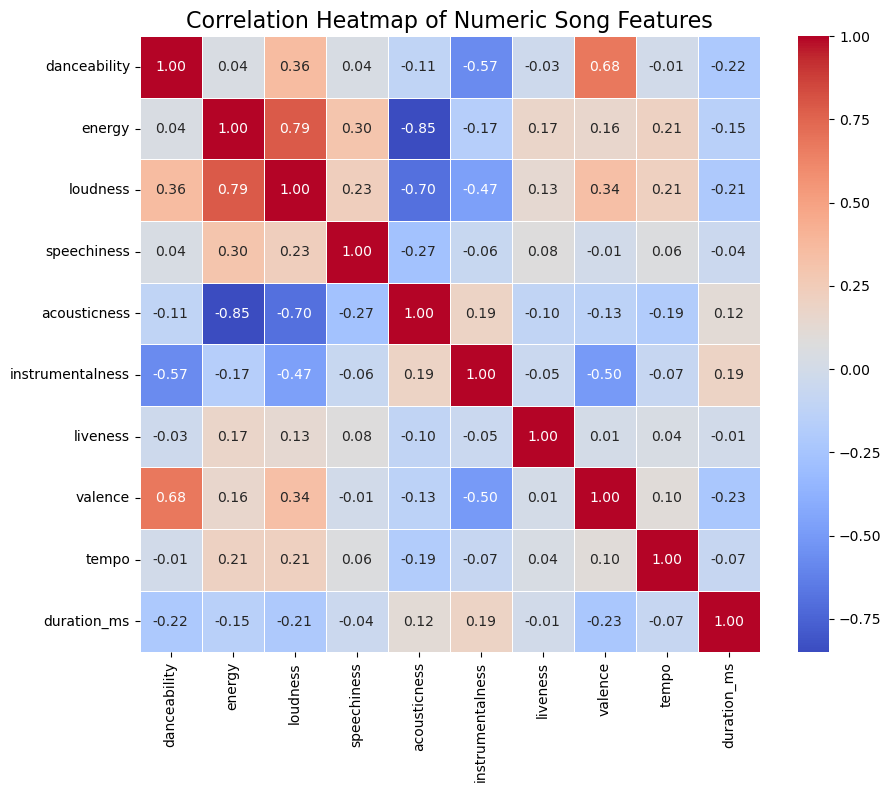

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = songs_df.corr()

# Set up the matplotlib figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn, with annotations and a coolwarm color map
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    annot_kws={"size": 10}
)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Numeric Song Features', fontsize=16)

# Display the plot
plt.show()

In [112]:
# This will ensure the outputs of the .transform() method are pandas data frames
from sklearn import set_config
set_config(transform_output='pandas')

In [113]:
# MIN MAX
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(songs_df)

In [114]:
# Display age column of original DataFrame and age column of MinMaxed DataFrame to compare
pd.DataFrame({
    'original': songs_df.iloc[:,-1],
    'min_max_scale': scaled_features_df.iloc[:,-1]
}).sort_values(by='original')

original  min_max_scale
name                                                                       
To a Twisted Recess of Mind                    ...     32760       0.000000
Pulsating Cerebral Slime                       ...     36387       0.000959
Bonesaw                                        ...     46000       0.003500
Sand                                           ...     48982       0.004288
Swallowed Whole                                ...     51267       0.004892
...                                                      ...            ...
Tod und Verklärung Op.24, TrV 158              ...   1615000       0.418247
Essence                                        ...   1793760       0.465500
Symphony No. 3                                 ...   1893667       0.491910
Symphony No. 6                                 ...   3590693       0.940499
dlp 1.1                                        ...   3815787       1.000000

[5235 rows x 2 columns]

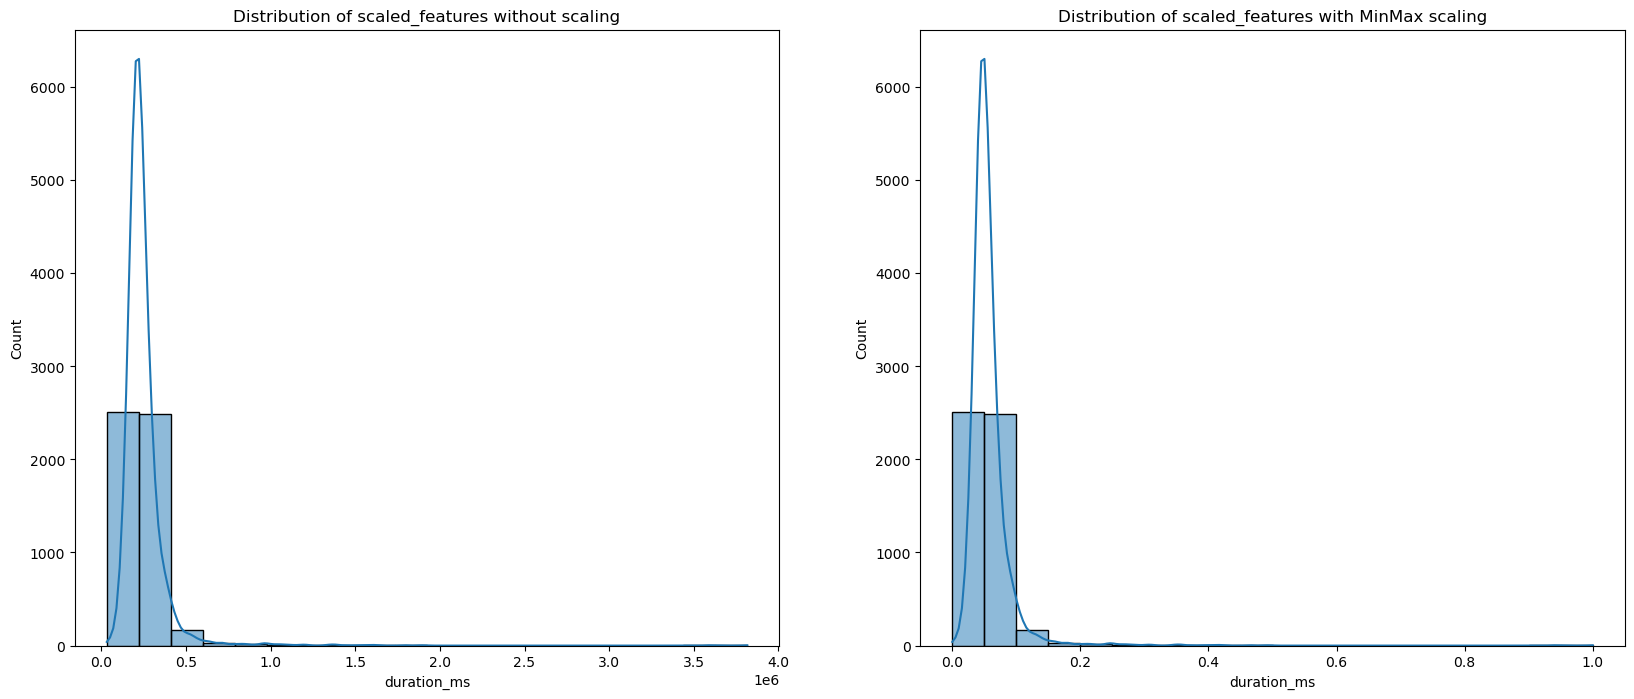

In [115]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=songs_df.iloc[:,-1], bins=20, kde=True, ax=ax1);
sns.histplot(scaled_features_df.iloc[:,-1], bins=20, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of scaled_features without scaling')
ax2.set_title('Distribution of scaled_features with MinMax scaling')

plt.show()

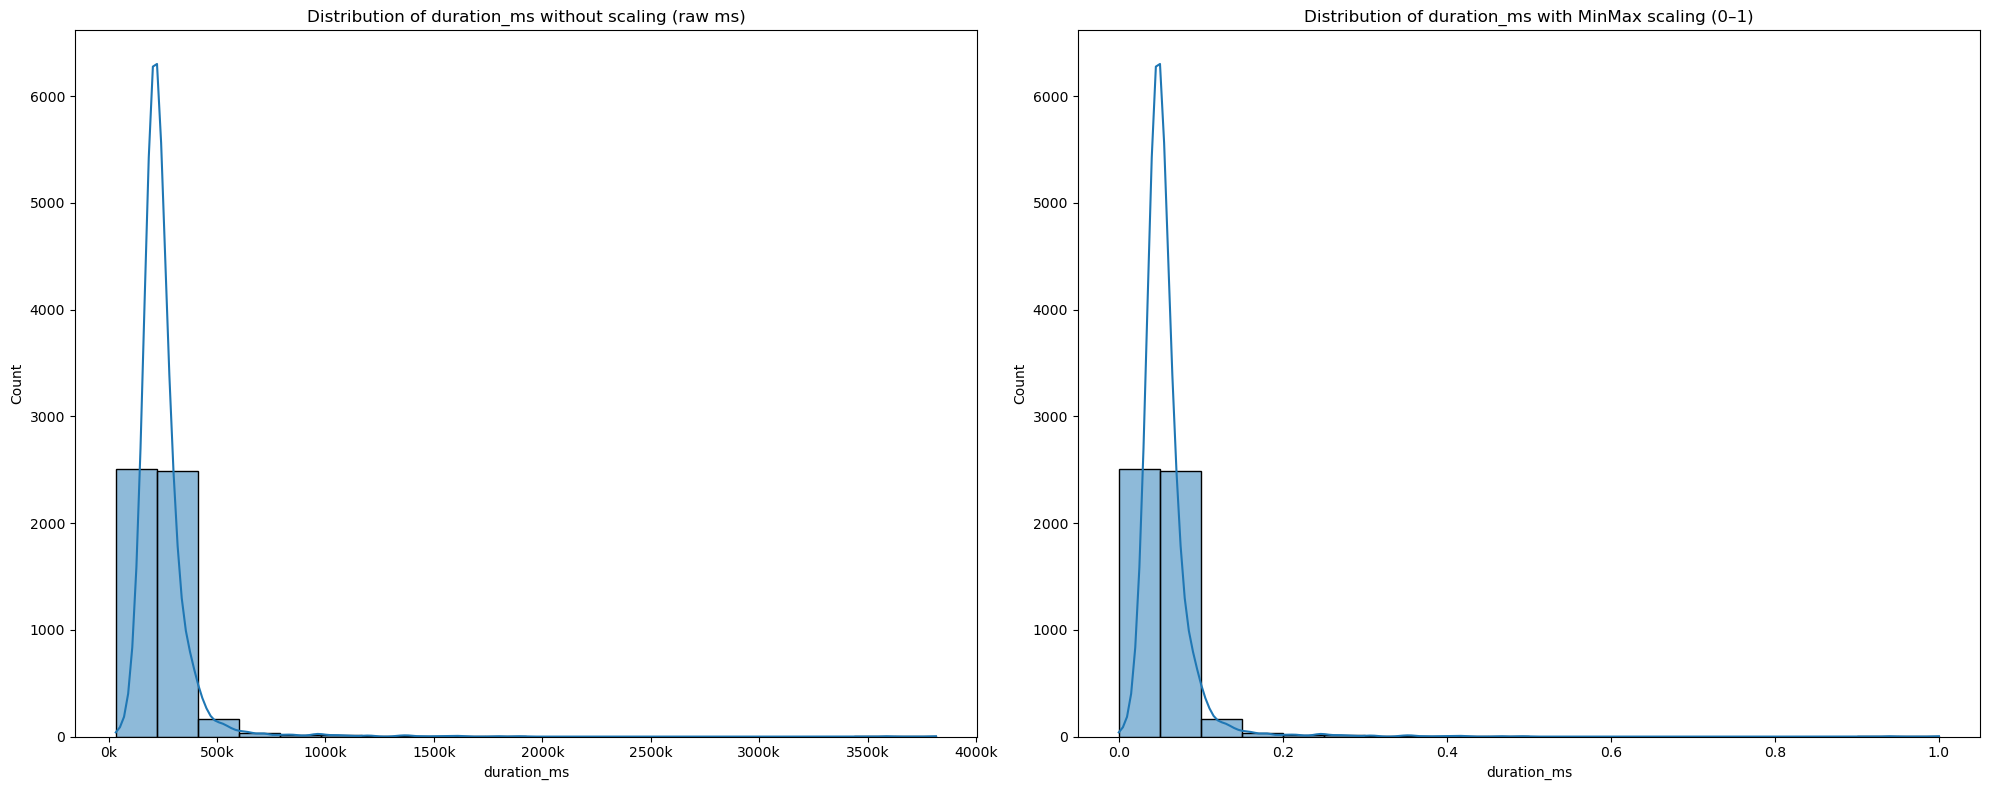

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Custom formatter: show values in thousands with "k"
def thousands(x, pos):
    return f"{int(x/1000)}k"

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot raw values with explicit column name
sns.histplot(x="duration_ms", data=songs_df, bins=20, kde=True, ax=ax1)

# Plot scaled values
sns.histplot(x="duration_ms", data=scaled_features_df, bins=20, kde=True, ax=ax2)

# Titles
ax1.set_title('Distribution of duration_ms without scaling (raw ms)')
ax2.set_title('Distribution of duration_ms with MinMax scaling (0–1)')

# Apply custom tick formatter to raw values
ax1.xaxis.set_major_formatter(FuncFormatter(thousands))

plt.tight_layout()
plt.show()

In [117]:
# Skewness of each numeric feature
songs_df.skew(numeric_only=True).sort_values(ascending=False)

duration_ms         9.704472
speechiness         2.600441
liveness            2.177075
instrumentalness    0.953769
acousticness        0.931508
tempo               0.416987
valence             0.225975
danceability       -0.129877
energy             -0.797073
loudness           -1.955659
dtype: float64

In [118]:
# Heavily right-skewed
	# •	duration_ms (9.70) → np.log1p(duration_ms)
	# •	speechiness (2.60) → np.log1p(speechiness) or np.sqrt(speechiness)
	# •	liveness (2.18) → np.log1p(liveness) or np.sqrt(liveness)

# Moderately right-skewed
	# •	instrumentalness (0.95) → np.sqrt(instrumentalness)
	# •	acousticness (0.93) → np.sqrt(acousticness)
	# •	tempo (0.42) → mild skew, can leave it or apply np.sqrt(tempo) if you want symmetry

# Close to symmetric
	# •	valence (0.23) → fine as is
	# •	danceability (-0.13) → fine as is

# Negatively skewed
	# •	energy (-0.80) → try squaring (energy**2) or use PowerTransformer
	# •	loudness (-1.95) → strong left-skew, best handled with PowerTransformer (Yeo–Johnson handles negatives too)

In [119]:
# Conclusion: several features are skewed (some heavily). Only valence and danceability are close to symmetric.

In [120]:
# QuantileTransformer

In [121]:
# Create a QuantileTransformer object
scaler = QuantileTransformer()

# Transform the songs DataFrame
data_quantile = scaler.fit_transform(songs_df)

In [122]:
data_quantile.skew(numeric_only=True).sort_values(ascending=False)

energy              0.000105
liveness            0.000065
valence             0.000045
loudness            0.000030
acousticness        0.000030
duration_ms         0.000008
speechiness        -0.000001
danceability       -0.000004
tempo              -0.000053
instrumentalness   -0.179429
dtype: float64

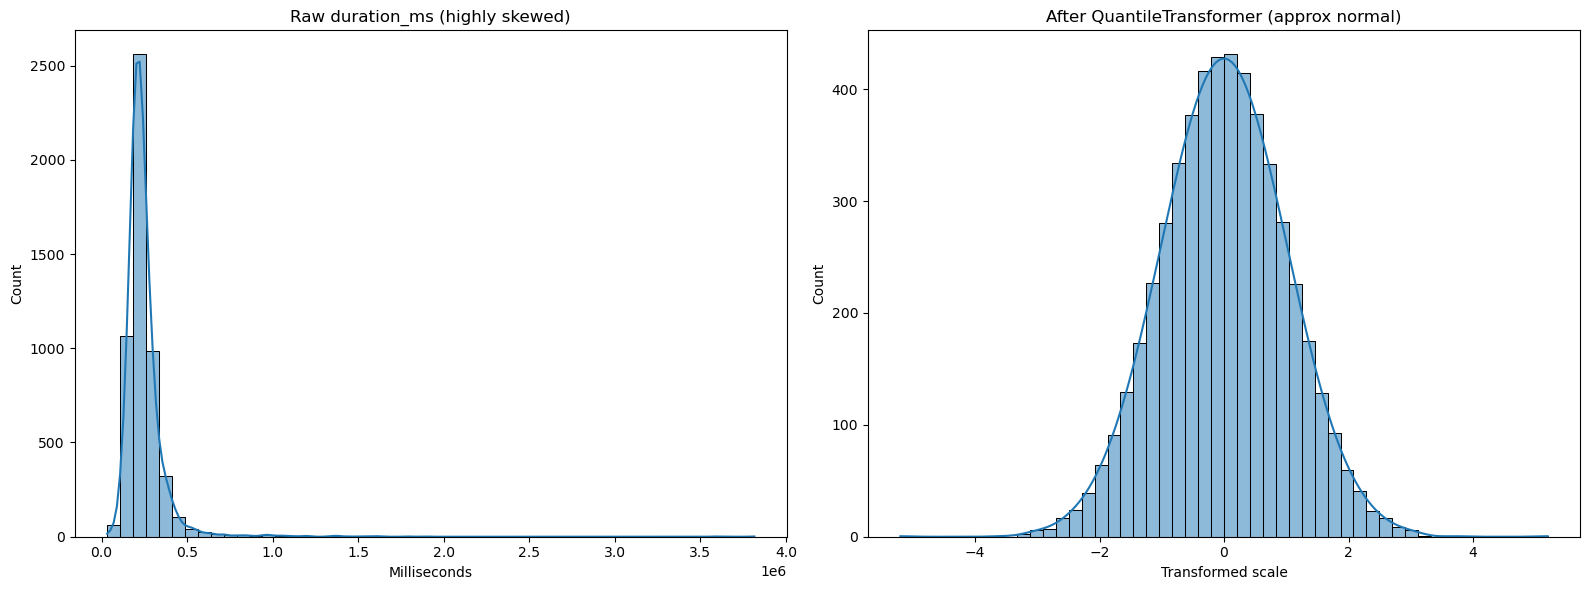

In [123]:
# Before & After

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
import pandas as pd

# Take original numeric features
numeric_df = songs_df.select_dtypes('number')

# Apply QuantileTransformer
qt = QuantileTransformer(output_distribution="normal", random_state=42)
data_qt = qt.fit_transform(numeric_df)

# Put back into DataFrame with same column names
data_qt_df = pd.DataFrame(data_qt, columns=numeric_df.columns, index=songs_df.index)

# Plot histograms: raw vs transformed duration_ms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(numeric_df['duration_ms'], bins=50, kde=True, ax=ax1)
ax1.set_title("Raw duration_ms (highly skewed)")
ax1.set_xlabel("Milliseconds")

sns.histplot(data_qt_df['duration_ms'], bins=50, kde=True, ax=ax2)
ax2.set_title("After QuantileTransformer (approx normal)")
ax2.set_xlabel("Transformed scale")

plt.tight_layout()
plt.show()

In [124]:
# 	✅ Pro: very balanced input for clustering.
# 	⚠️ Con: may distort real distances between songs (e.g., a song with extremely high duration_ms gets compressed to look “normal”).

In [125]:
# Next step (PCA 95% variance):

In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(data_quantile)

print("Original shape:", data_quantile.shape)
print("Reduced shape:", X_pca.shape)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Original shape: (5235, 10)
Reduced shape: (5235, 8)
Total explained variance: 0.9622448509720787


In [127]:
X_pca.head()

pca0      pca1  \
name                                                                     
Se Eu Quiser Falar Com Deus                    ...  0.231663  0.319583   
Saudade De Bahia                               ... -0.074716  0.668900   
Canta Canta, Minha Gente                       ... -0.355745  0.398257   
Mulher Eu Sei                                  ...  0.157530  0.683461   
Rosa Morena                                    ...  0.419990  0.621894   

                                                        pca2      pca3  \
name                                                                     
Se Eu Quiser Falar Com Deus                    ...  0.219159 -0.409338   
Saudade De Bahia                               ...  0.109111  0.199580   
Canta Canta, Minha Gente                       ... -0.131032 -0.337105   
Mulher Eu Sei                                  ...  0.392667 -0.353809   
Rosa Morena                                    ... -0.099866  0.155448   

                                                        pca4      pca5  \
name                                                                     
Se Eu Quiser Falar Com Deus                    ...  0.325799  0.392869   
Saudade De Bahia                               ... -0.091160 -0.060026   
Canta Canta, Minha Gente                       ... -0.505605  0.465295   
Mulher Eu Sei                                  ... -0.043141  0.235859   
Rosa Morena                                    ...  0.259834  0.126471   

                                                        pca6      pca7  
name                                                                    
Se Eu Quiser Falar Com Deus                    ...  0.044932  0.077709  
Saudade De Bahia                               ...  0.122996 -0.158989  
Canta Canta, Minha Gente                       ...  0.332658 -0.077365  
Mulher Eu Sei                                  ...  0.139870 -0.011703  
Rosa Morena                                    ...  0.066422 -0.000651

In [128]:
# songs dataset you ended up with 5 components explaining ≈0.95% of the variance.

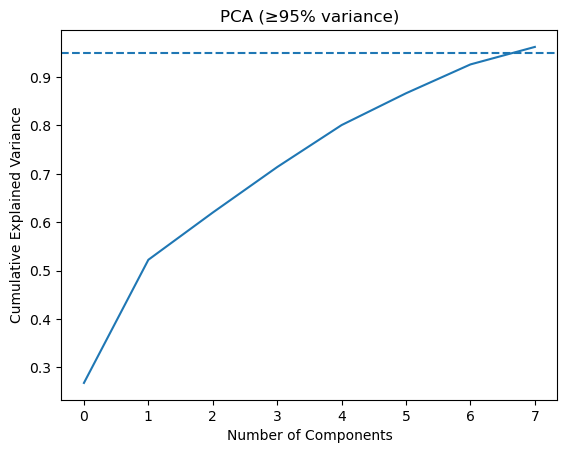

In [129]:
# cumulative explained variance curve.
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95, linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA (≥95% variance)")
plt.show()

In [130]:
# exact values:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.26795144, 0.52241558, 0.62000874, 0.71400544, 0.80075156,
       0.86648724, 0.92609547, 0.96224485])

In [131]:
# This is the cumulative explained variance after each component:
#   1. PC1 → 26.8%
#   2. PC2 → 52.2%
#   3. PC3 → 62.0%
#   4. PC4 → 71.4%
#   5. PC5 → 80.1%
#   6. PC6 → 86.6%
#   7. PC7 → 92.6%
#   8. PC8 → 96.2% ✅ (first time ≥95%)

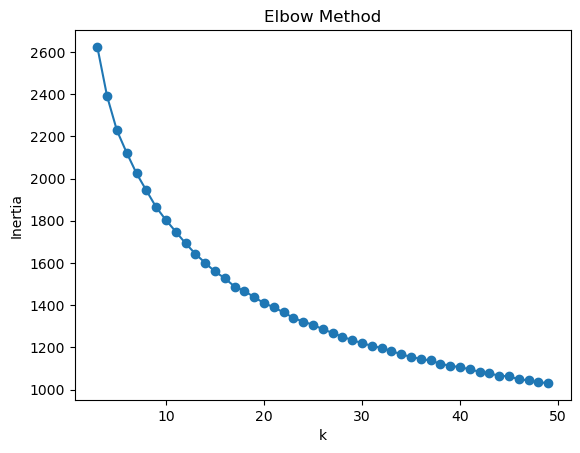

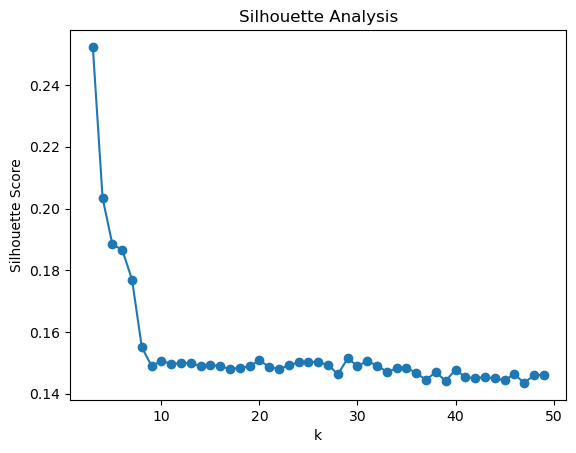

In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K_range = range(3, 50)  # try k = 2...20 for larger dataset

inertias = []
silhouettes = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_pca)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(X_pca, labels))

# Elbow plot
plt.plot(K_range, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhouette plot
plt.plot(K_range, silhouettes, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

In [133]:
# Cluster the data with K-Means
from sklearn.cluster import KMeans

model = KMeans(n_clusters=20, random_state=42)
model.fit(X_pca)

KMeans(n_clusters=20, random_state=42)

In [134]:
model.inertia_

1409.8147867803418

In [135]:
silhouette_score(X_pca, labels)

0.1461439873856039

In [136]:
model.labels_

array([ 5,  4,  8, ..., 16, 16, 16], dtype=int32)

In [137]:
songs_df['cluster_KMeans'] = model.labels_
songs_df_sorted = songs_df.sort_values('cluster_KMeans')
songs_df_sorted.head()

danceability  energy  \
name                                                                       
Take Me to Church                              ...         0.425  0.1440   
'Round Midnight                                ...         0.542  0.3200   
Tora                                           ...         0.458  0.1620   
Arc                                            ...         0.270  0.0956   
Beethoven Variation (After String Quartet No. 1...         0.558  0.2570   

                                                    loudness  speechiness  \
name                                                                        
Take Me to Church                              ...   -17.430       0.0591   
'Round Midnight                                ...    -9.975       0.0387   
Tora                                           ...   -19.754       0.0303   
Arc                                            ...   -24.192       0.0363   
Beethoven Variation (After String Quartet No. 1...   -17.963       0.0418   

                                                    acousticness  \
name                                                               
Take Me to Church                              ...         0.985   
'Round Midnight                                ...         0.907   
Tora                                           ...         0.971   
Arc                                            ...         0.975   
Beethoven Variation (After String Quartet No. 1...         0.985   

                                                    instrumentalness  \
name                                                                   
Take Me to Church                              ...             0.915   
'Round Midnight                                ...             0.649   
Tora                                           ...             0.938   
Arc                                            ...             0.906   
Beethoven Variation (After String Quartet No. 1...             0.889   

                                                    liveness  valence  \
name                                                                    
Take Me to Church                              ...    0.1100   0.1930   
'Round Midnight                                ...    0.0609   0.2060   
Tora                                           ...    0.0881   0.1100   
Arc                                            ...    0.0973   0.0572   
Beethoven Variation (After String Quartet No. 1...    0.1040   0.4310   

                                                      tempo  duration_ms  \
name                                                                       
Take Me to Church                              ...  123.378       123896   
'Round Midnight                                ...  116.648       193840   
Tora                                           ...  141.231       160995   
Arc                                            ...  136.894       188080   
Beethoven Variation (After String Quartet No. 1...  123.505       173596   

                                                    cluster_KMeans  
name                                                                
Take Me to Church                              ...               0  
'Round Midnight                                ...               0  
Tora                                           ...               0  
Arc                                            ...               0  
Beethoven Variation (After String Quartet No. 1...               0

In [138]:
# Visualize clusters in PCA space

# tsne

# scatter plots

# radar chart

# 3 dimentional chart


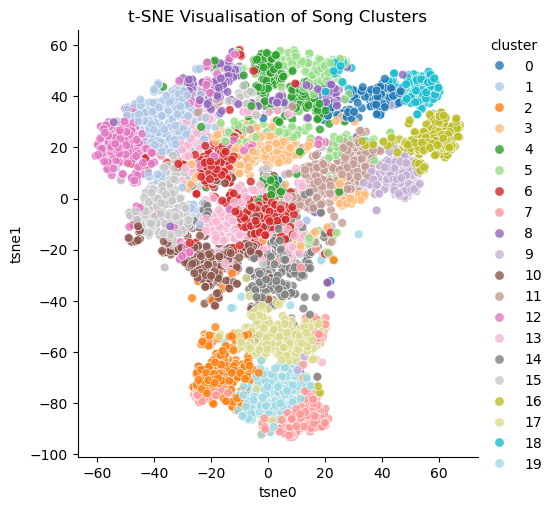

In [139]:
# TSNE
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(
    n_components=2,
    perplexity=50,      # larger dataset -> larger perplexity
    learning_rate=200,  # step size
    max_iter=2000,        # more iterations = more stable
    random_state=42
).set_output(transform="pandas")

tsne_results = tsne.fit_transform(data_quantile)

# Add cluster labels
tsne_results['cluster'] = model.labels_

# Plot t-SNE results
(
    sns.relplot(
        data=tsne_results,
        x='tsne0',
        y='tsne1',
        hue='cluster',
        palette='tab20',
        s=40,
        alpha=0.8
    )
    .set(title="t-SNE Visualisation of Song Clusters")
)

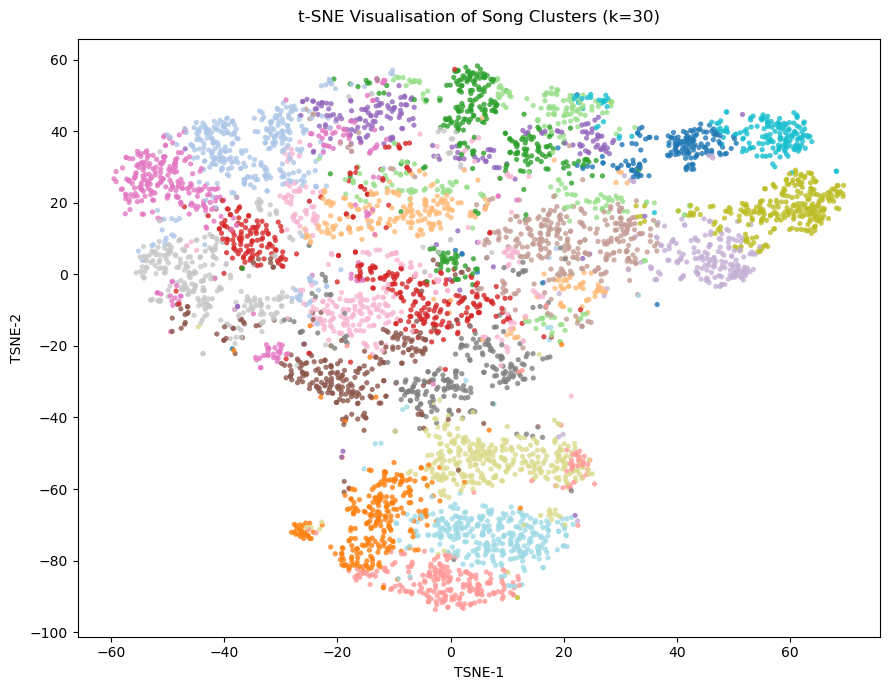

In [200]:
# TSNE for 5k+ songs, using your values
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Use your quantile-transformed data (you can also use X_pca if you prefer)
X = X_pca  # or: X = data_quantile

tsne = TSNE(
    n_components=2,
    perplexity=50,       # good for thousands of samples
    learning_rate=200,
    init='pca',
    max_iter=2000,       # renamed from n_iter in sklearn >=1.5
    random_state=42
).set_output(transform="pandas")

tsne_df = tsne.fit_transform(X)

# Add your KMeans labels (k=20)
tsne_df['cluster'] = model.labels_

# Plot (tab20 is better for many discrete clusters)
plt.figure(figsize=(9, 7))
ax = sns.scatterplot(
    data=tsne_df,
    x='tsne0', y='tsne1',
    hue='cluster',
    palette='tab20',
    s=14, alpha=0.8,
    linewidth=0
)

ax.set_title("t-SNE Visualisation of Song Clusters (k=30)", pad=12)
ax.set_xlabel("TSNE-1"); ax.set_ylabel("TSNE-2")

# Legends with 30 items are huge; feel free to hide or move outside:
ax.legend_.remove()  # comment this out if you want the legend

plt.tight_layout()
plt.show()

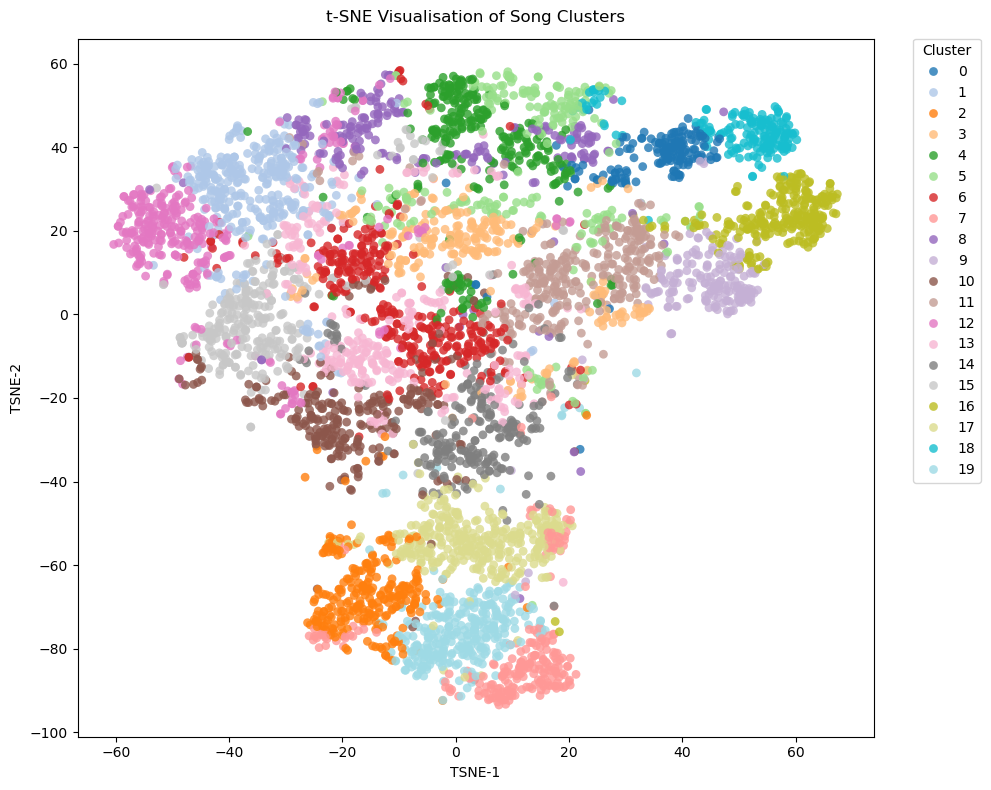

In [201]:
# TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Compute TSNE (using quantile-transformed data here)
tsne = TSNE(
    n_components=2,
    perplexity=50,      # larger dataset -> larger perplexity
    learning_rate=200,  # step size
    max_iter=2000,      # more iterations = more stable
    random_state=42
).set_output(transform="pandas")

tsne_results = tsne.fit_transform(data_quantile)

# Add cluster labels (from your fitted KMeans model)
tsne_results['cluster'] = model.labels_

# Plot t-SNE results with legend on the side
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=tsne_results,
    x='tsne0', y='tsne1',
    hue='cluster',
    palette='tab20',
    s=40, alpha=0.8,
    linewidth=0
)

ax.set_title("t-SNE Visualisation of Song Clusters", pad=12)
ax.set_xlabel("TSNE-1"); ax.set_ylabel("TSNE-2")

# Move legend outside the plot (to the right)
plt.legend(
    title="Cluster",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

#### songs_df_sorted.sample(5)

In [202]:
import pandas as pd

# Count how many songs per KMeans cluster
kmeans_counts = pd.Series(model.labels_).value_counts().sort_index()

print("Cluster sizes:")
print(kmeans_counts)

Cluster sizes:
0     163
1     340
2     269
3     245
4     280
5     246
6     344
7     243
8     195
9     184
10    252
11    303
12    318
13    281
14    221
15    284
16    263
17    322
18    176
19    306
Name: count, dtype: int64


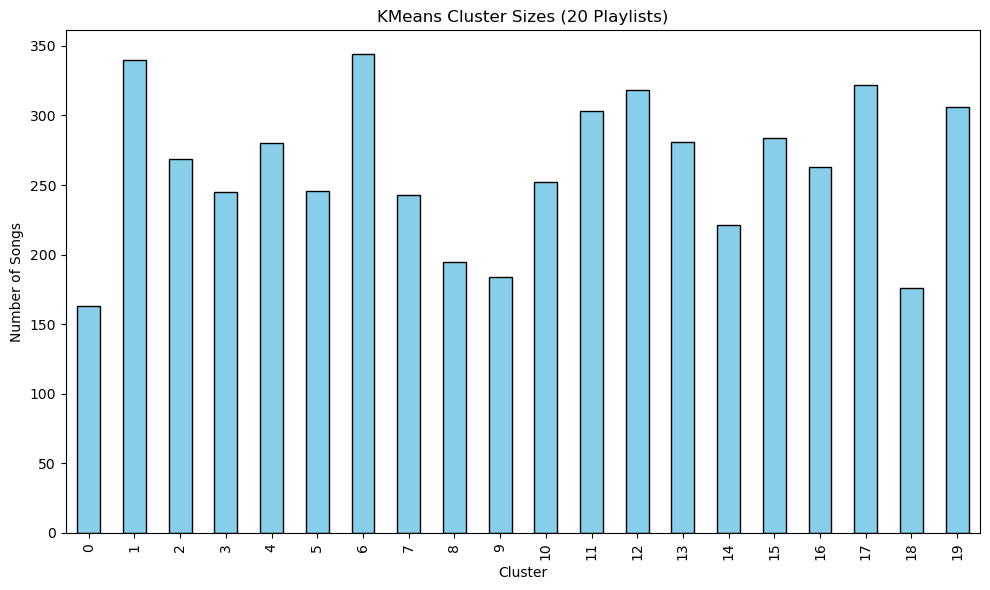

In [203]:
import matplotlib.pyplot as plt

kmeans_counts.plot(kind="bar", figsize=(10,6), color="skyblue", edgecolor="black")
plt.title("KMeans Cluster Sizes (20 Playlists)")
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

In [142]:
# 	Quantile transformed → PCA → KMeans (k=20) is done.

In [143]:
# Now we must Interpret clusters:
# We need Cluster centroids

In [144]:
# Cluster centroids (mean feature values per cluster)
centroids = songs_df.groupby('cluster_KMeans').mean(numeric_only=True)

# Show first rows
print(centroids.head())

                danceability    energy   loudness  speechiness  acousticness  \
cluster_KMeans                                                                 
0                   0.374764  0.169515 -19.462258     0.046656      0.881790   
1                   0.766971  0.730641  -5.377668     0.124374      0.154309   
2                   0.264639  0.938234  -7.506918     0.120066      0.007899   
3                   0.509841  0.575007  -7.150686     0.038917      0.312851   
4                   0.607625  0.524918 -10.254064     0.041002      0.490589   

                instrumentalness  liveness   valence       tempo  \
cluster_KMeans                                                     
0                       0.653126  0.144808  0.230713  145.747957   
1                       0.000683  0.077379  0.685709  101.977400   
2                       0.578226  0.198120  0.199882  116.259669   
3                       0.000237  0.155948  0.328742  135.398290   
4                       0.02127

In [145]:
# 0 – Chill Acoustic Instrumental (Sad/Moody)
# 1 – Dance Pop / Vocal EDM (Happy)
# 2 – Intense Instrumental Electronic / Rock (Dark)
# 3 – Indie / Singer-Songwriter (Mid-tempo)
# 4 – Happy Acoustic Pop (Upbeat, Short)
# 5 – Danceable & Happy (Vocal Pop)
# 6 – Energetic Electronic / Fast Beats
# 7 – Long Tracks / Mixed Styles
# 8 – Danceable Rap / Hip-Hop
# 9 – Happy Spoken / Rap-Pop
# 10 – Dark Energetic Electronic Instrumental
# 11 – Energetic with Live Feel (Mixed)
# 12 – Danceable Electronic Rap (Dark but Groovy)
# 13 – Speech-Heavy Rap
# 14 – Fast Rap (High Tempo)
# 15 – Short Happy Pop
# 16 – Chill Acoustic / Moody Slow
# 17 – Chill Acoustic Instrumental (Extended)
# 18 – Experimental / Instrumental Mix
# 19 – Energetic Electronic (Club/Live)

In [146]:
# TRY DBSCAN

In [147]:
# pick min samples

d = X_pca.shape[1]            # e.g., 8
min_samples = max(5, 2*d)     # e.g., 16
print("min_samples =", min_samples)

min_samples = 16


In [148]:
from sklearn.cluster import DBSCAN
import pandas as pd

eps_values = [0.5, 1.0, 1.5, 2.0, 3.0]   # adjust depending on your k-distance plot
results = {}

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_pct = list(labels).count(-1) / len(labels) * 100
    results[eps] = (n_clusters, round(noise_pct, 1))

pd.DataFrame(results, index=["clusters", "noise %"])

0.5  1.0  1.5  2.0  3.0
clusters  1.0  1.0  1.0  1.0  1.0
noise %   0.6  0.0  0.0  0.0  0.0

In [149]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

eps_values = np.linspace(0.05, 0.3, 15)   # finer grid
min_samples_values = [15, 20, 25, 30]

results = []
for min_samples in min_samples_values:
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_pct = list(labels).count(-1) / len(labels) * 100
        results.append((min_samples, round(eps,3), n_clusters, round(noise_pct,1)))

df = pd.DataFrame(results, columns=["min_samples", "eps", "clusters", "noise %"])
print(df)

    min_samples    eps  clusters  noise %
0            15  0.050         0    100.0
1            15  0.068         0    100.0
2            15  0.086         0    100.0
3            15  0.104         0    100.0
4            15  0.121         0    100.0
5            15  0.139         0    100.0
6            15  0.157         0    100.0
7            15  0.175         1     99.5
8            15  0.193         1     99.2
9            15  0.211         1     98.7
10           15  0.229         2     98.1
11           15  0.246         3     96.1
12           15  0.264         5     94.1
13           15  0.282        11     87.7
14           15  0.300        10     81.1
15           20  0.050         0    100.0
16           20  0.068         0    100.0
17           20  0.086         0    100.0
18           20  0.104         0    100.0
19           20  0.121         0    100.0
20           20  0.139         0    100.0
21           20  0.157         0    100.0
22           20  0.175         0  

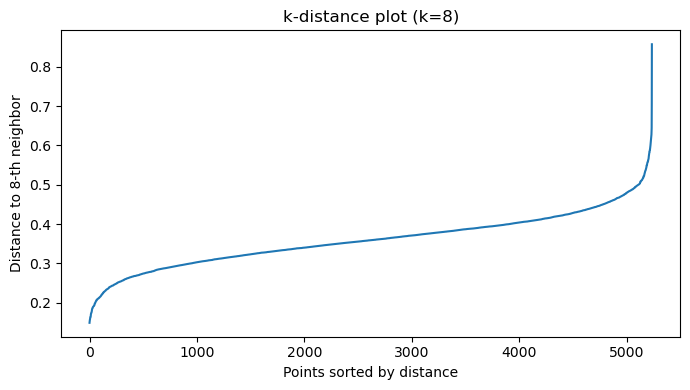

In [150]:
# k-distance plot to choose eps

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 8
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', n_jobs=-1)
nn.fit(X_pca)
dists, _ = nn.kneighbors(X_pca)

k_dists = np.sort(dists[:, -1])          # distance to k-th neighbor
plt.figure(figsize=(7,4))
plt.plot(k_dists)
plt.title(f'k-distance plot (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}-th neighbor')
plt.tight_layout()
plt.show()

In [151]:
import numpy as np, pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

def kdist_eps_candidates(X, k, qs=np.linspace(0.85, 0.98, 8), metric="euclidean"):
    nn = NearestNeighbors(n_neighbors=k, metric=metric).fit(X)
    dists, _ = nn.kneighbors(X)
    k_d = np.sort(dists[:, -1])
    return np.quantile(k_d, qs)

def summarize(labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_pct = (labels == -1).mean() * 100
    return int(n_clusters), float(round(noise_pct, 1))

def safe_silhouette(X, labels, metric="euclidean"):
    mask = labels != -1
    if mask.sum() > 50 and len(set(labels[mask])) > 1:
        try:
            return float(round(silhouette_score(X[mask], labels[mask], metric=metric), 3))
        except Exception:
            pass
    return np.nan

def tune_dbscan_for_target(X, target_k=20, noise_cap=35, metric="euclidean"):
    rows = []
    # Try from permissive to stricter; add bigger values if you want “macro” clusters
    min_samples_grid = [8, 12, 16, 20, 25, 30, 40]
    for ms in min_samples_grid:
        for eps in kdist_eps_candidates(X, ms, metric=metric):
            db = DBSCAN(eps=float(eps), min_samples=ms, metric=metric, n_jobs=-1)
            labels = db.fit_predict(X)
            k, noise = summarize(labels)
            sil = safe_silhouette(X, labels, metric=("cosine" if metric=="cosine" else "euclidean"))
            # score: closer to 20 clusters, penalize high noise, reward silhouette
            k_pen = abs(k - target_k)
            noise_pen = max(0, noise - noise_cap) / 10.0
            sil_reward = -(sil if not np.isnan(sil) else 0)
            score = k_pen + noise_pen + sil_reward
            rows.append(dict(min_samples=ms, eps=float(round(eps,6)), clusters=k,
                             noise_pct=float(round(noise,1)), silhouette=(None if np.isnan(sil) else sil),
                             score=score, labels=labels))
    df = pd.DataFrame(rows).sort_values(["score","clusters","noise_pct"]).reset_index(drop=True)
    best = df.iloc[0]
    return df, best

# --- Run on your existing PCA data ---
df_scan, best = tune_dbscan_for_target(X_pca, target_k=20, noise_cap=35, metric="euclidean")
print(df_scan.head(10)[["min_samples","eps","clusters","noise_pct","silhouette","score"]])

# Apply the best labels to your dataframe
songs_df["cluster_DBSCAN"] = best["labels"]
print(f"\nChosen -> min_samples={best['min_samples']}, eps={best['eps']}, "
      f"clusters={best['clusters']}, noise%={best['noise_pct']}, silhouette={best['silhouette']}")

   min_samples       eps  clusters  noise_pct silhouette  score
0           25  0.608818         1        0.0       None   19.0
1           30  0.596129         1        0.0       None   19.0
2           30  0.625832         1        0.0       None   19.0
3           40  0.621526         1        0.0       None   19.0
4           40  0.654330         1        0.0       None   19.0
5           12  0.540021         1        0.1       None   19.0
6           16  0.568685         1        0.1       None   19.0
7           20  0.559330         1        0.1       None   19.0
8           20  0.585549         1        0.1       None   19.0
9           25  0.560246         1        0.1       None   19.0

Chosen -> min_samples=25, eps=0.608818, clusters=1, noise%=0.0, silhouette=None


In [152]:
# inside kdist_eps_candidates, change qs
qs=np.linspace(0.5, 0.9, 10)

In [153]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def evaluate_dbscan(X, min_samples, eps_values):
    rows = []
    for eps in eps_values:
        labels = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', n_jobs=-1).fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = (labels == -1).mean()
        sil = None
        if n_clusters > 1 and noise_ratio < 1.0:
            sil = silhouette_score(X, labels)
        rows.append((eps, n_clusters, noise_ratio, sil))
    return rows

# pick center from the plot; here’s an example center=1.0 — adjust based on your plot
center = 1.0
eps_values = np.round(np.linspace(center*0.7, center*1.3, 11), 3)
results = evaluate_dbscan(X_pca, min_samples, eps_values)

for eps, k_found, noise, sil in results:
    print(f"eps={eps:.3f} -> clusters={k_found}, noise={noise:.0%}, silhouette={sil}")

eps=0.700 -> clusters=1, noise=0%, silhouette=None
eps=0.760 -> clusters=1, noise=0%, silhouette=None
eps=0.820 -> clusters=1, noise=0%, silhouette=None
eps=0.880 -> clusters=1, noise=0%, silhouette=None
eps=0.940 -> clusters=1, noise=0%, silhouette=None
eps=1.000 -> clusters=1, noise=0%, silhouette=None
eps=1.060 -> clusters=1, noise=0%, silhouette=None
eps=1.120 -> clusters=1, noise=0%, silhouette=None
eps=1.180 -> clusters=1, noise=0%, silhouette=None
eps=1.240 -> clusters=1, noise=0%, silhouette=None
eps=1.300 -> clusters=1, noise=0%, silhouette=None


In [154]:
best_eps = 1.05  # <- replace with your chosen value
dbscan = DBSCAN(eps=best_eps, min_samples=min_samples, metric='euclidean', n_jobs=-1)
labels = dbscan.fit_predict(X_pca)

songs_df = songs_df.copy()
songs_df['dbscan_cluster'] = labels  # -1 are noise
print("clusters:", len(set(labels)) - (1 if -1 in labels else 0),
      "| noise:", (labels==-1).mean())

clusters: 1 | noise: 0.0


In [155]:
# NOW ready to TRY

In [ ]:
# UMAP + DBSCAN

In [156]:
!pip install umap-learn

In [157]:
import umap

um = umap.UMAP(
    n_neighbors=100,   # balances local/global structure
    min_dist=0.2,     # controls how tightly clusters pack
    n_components=10,  # dimensionality of embedding
    random_state=42
)

X_umap = um.fit_transform(data_quantile)
print("UMAP shape:", X_umap.shape)

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP shape: (5235, 10)


In [158]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=7, metric="euclidean", n_jobs=-1)
labels = db.fit_predict(X_umap)

songs_df["cluster_DBSCAN_umap"] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_pct = (labels == -1).mean() * 100

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {noise_pct:.1f}%")
print(pd.Series(labels).value_counts().sort_index())

Clusters found: 1
Noise points: 1.3%
-1      67
 0    5168
Name: count, dtype: int64


In [159]:
for ms in [5, 7, 10]:
    for eps in [0.3, 0.4, 0.5, 0.6, 0.7]:
        db = DBSCAN(eps=eps, min_samples=ms, metric="euclidean", n_jobs=-1)
        labels = db.fit_predict(X_umap)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_pct = (labels == -1).mean() * 100
        print(f"ms={ms}, eps={eps:.2f} -> clusters={n_clusters}, noise={noise_pct:.1f}%")

ms=5, eps=0.30 -> clusters=88, noise=24.0%
ms=5, eps=0.40 -> clusters=8, noise=5.2%
ms=5, eps=0.50 -> clusters=1, noise=1.0%
ms=5, eps=0.60 -> clusters=1, noise=0.2%
ms=5, eps=0.70 -> clusters=1, noise=0.0%
ms=7, eps=0.30 -> clusters=53, noise=34.9%
ms=7, eps=0.40 -> clusters=9, noise=7.8%
ms=7, eps=0.50 -> clusters=1, noise=1.3%
ms=7, eps=0.60 -> clusters=1, noise=0.3%
ms=7, eps=0.70 -> clusters=1, noise=0.0%
ms=10, eps=0.30 -> clusters=40, noise=47.0%
ms=10, eps=0.40 -> clusters=19, noise=14.3%
ms=10, eps=0.50 -> clusters=3, noise=2.1%
ms=10, eps=0.60 -> clusters=1, noise=0.5%
ms=10, eps=0.70 -> clusters=1, noise=0.1%


In [160]:
sizes = songs_df["cluster_DBSCAN_umap"].value_counts().sort_index()
print("Cluster sizes:\n", sizes)

Cluster sizes:
 cluster_DBSCAN_umap
-1      67
 0    5168
Name: count, dtype: int64


In [161]:
# Inspect cluster sizes

In [162]:
db = DBSCAN(eps=0.40, min_samples=10, metric="euclidean", n_jobs=-1)
labels = db.fit_predict(X_umap)
songs_df["cluster_DBSCAN_umap"] = labels

print(pd.Series(labels).value_counts().sort_index())

-1      749
 0     1110
 1      140
 2       11
 3      970
 4       27
 5      361
 6      452
 7       84
 8       18
 9     1114
 10       6
 11     128
 12      12
 13       9
 14       9
 15      14
 16       9
 17      10
 18       2
Name: count, dtype: int64


In [163]:
num_cols = ["danceability","energy","loudness","speechiness","acousticness",
            "instrumentalness","liveness","valence","tempo","duration_ms"]

centroids = songs_df[songs_df["cluster_DBSCAN_umap"]!=-1].groupby("cluster_DBSCAN_umap")[num_cols].mean()
sizes = songs_df["cluster_DBSCAN_umap"].value_counts().sort_index()

print("Cluster sizes:\n", sizes)
print("\nFeature means per cluster:\n", centroids.head())

Cluster sizes:
 cluster_DBSCAN_umap
-1      749
 0     1110
 1      140
 2       11
 3      970
 4       27
 5      361
 6      452
 7       84
 8       18
 9     1114
 10       6
 11     128
 12      12
 13       9
 14       9
 15      14
 16       9
 17      10
 18       2
Name: count, dtype: int64

Feature means per cluster:
                      danceability    energy   loudness  speechiness  \
cluster_DBSCAN_umap                                                   
0                        0.405683  0.225801 -18.068361     0.043709   
1                        0.591929  0.469959 -10.602107     0.040209   
2                        0.559727  0.512000 -10.150273     0.055173   
3                        0.662137  0.715497  -5.626956     0.116309   
4                        0.547630  0.706259  -9.594444     0.055052   

                     acousticness  instrumentalness  liveness   valence  \
cluster_DBSCAN_umap                                                       
0                    

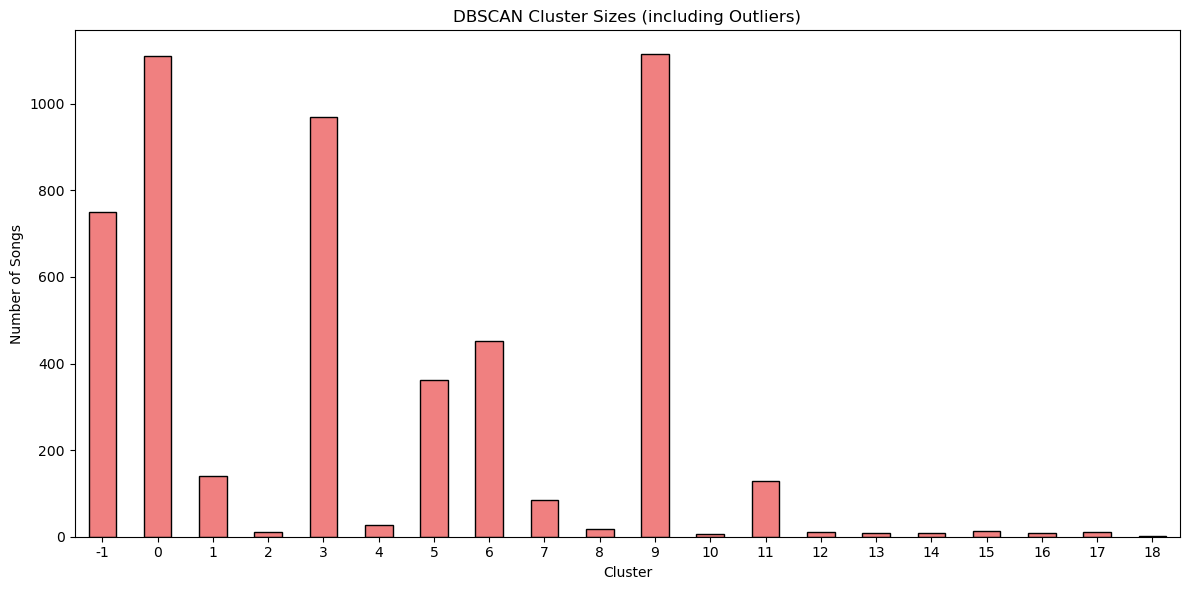

In [206]:
# bar chart

import matplotlib.pyplot as plt

# Plot DBSCAN cluster sizes
sizes.plot(kind="bar", figsize=(12,6), color="lightcoral", edgecolor="black")
plt.title("DBSCAN Cluster Sizes (including Outliers)")
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")

# Make x-axis labels clearer
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


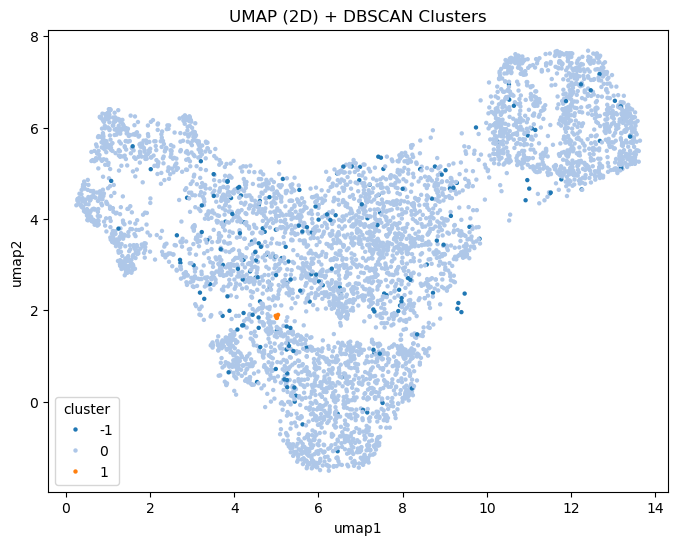

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

um2d = umap.UMAP(n_neighbors=50, min_dist=0.2, n_components=2, random_state=42).fit_transform(data_quantile)
df_vis = pd.DataFrame(um2d, columns=["umap1","umap2"])
df_vis["cluster"] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_vis, x="umap1", y="umap2", hue="cluster", palette="tab20", s=10, linewidth=0)
plt.title("UMAP (2D) + DBSCAN Clusters")
plt.show()

In [165]:
from sklearn.metrics import silhouette_score
mask = songs_df["cluster_DBSCAN_umap"] != -1  # ignore noise
sil = silhouette_score(X_umap[mask], songs_df.loc[mask, "cluster_DBSCAN_umap"])
print("Silhouette score:", sil)

Silhouette score: 0.12738818


In [166]:
print(songs_df["cluster_DBSCAN_umap"].value_counts().sort_index())

cluster_DBSCAN_umap
-1      749
 0     1110
 1      140
 2       11
 3      970
 4       27
 5      361
 6      452
 7       84
 8       18
 9     1114
 10       6
 11     128
 12      12
 13       9
 14       9
 15      14
 16       9
 17      10
 18       2
Name: count, dtype: int64


In [167]:
print(df.columns)

Index(['min_samples', 'eps', 'clusters', 'noise %'], dtype='object')


In [168]:
import numpy as np
import pandas as pd

cluster_col = 'cluster_DBSCAN_umap'
feature_cols = [
    'danceability','energy','valence','tempo','loudness',
    'instrumentalness','speechiness','acousticness','liveness','duration_ms'
]

def safe_features(df, feature_cols):
    present = [c for c in feature_cols if c in df.columns]
    if not present:
        raise KeyError(f"No requested feature columns found. Got df columns: {list(df.columns)[:30]}")
    return present

def cluster_means_and_z(df, cluster_col, feat_cols):
    gmean = df[feat_cols].mean()
    gstd  = df[feat_cols].std(ddof=0).replace(0, np.nan)  # zero-std -> NaN
    cmean = df.groupby(cluster_col, dropna=False)[feat_cols].mean()
    z = (cmean - gmean) / gstd
    return cmean, z, gmean, gstd

def percentile_rank_of_mean(df, feat, clus_mean):
    # % of tracks with feature <= cluster mean (empirical CDF)
    return float((df[feat] <= clus_mean).mean())

def word_for(feat, z, pctl):
    # gentler thresholds
    z_hi, z_lo = 0.25, -0.25
    p_hi, p_lo = 0.70, 0.30

    def hi(): return (z is not None and z >= z_hi) or (pctl is not None and pctl >= p_hi)
    def lo(): return (z is not None and z <= z_lo) or (pctl is not None and pctl <= p_lo)

    if feat == 'valence':
        if hi(): return 'Happy'
        if lo(): return 'Dark/Moody'
    if feat == 'danceability':
        if hi(): return 'Danceable'
        if lo(): return 'Not Dancey'
    if feat == 'energy':
        if hi(): return 'Energetic'
        if lo(): return 'Chill'
    if feat == 'tempo':
        if hi(): return 'Fast'
        if lo(): return 'Slow'
    if feat == 'loudness':
        if hi(): return 'Loud'
        if lo(): return 'Quiet/Soft'
    if feat == 'instrumentalness':
        if hi(): return 'Instrumental'
        if lo(): return 'Vocal-Forward'
    if feat == 'speechiness':
        if hi(): return 'Spoken/Rap'
    if feat == 'acousticness':
        if hi(): return 'Acoustic'
        if lo(): return 'Electronic'
    if feat == 'liveness':
        if hi(): return 'Live'
    if feat == 'duration_ms':
        if hi(): return 'Long Tracks'
        if lo(): return 'Short Tracks'
    return None

def interpret_clusters(df, cluster_col, feat_cols, top_k=4):
    feat_cols = safe_features(df, feat_cols)
    cmean, z, gmean, gstd = cluster_means_and_z(df, cluster_col, feat_cols)
    sizes = df[cluster_col].value_counts(dropna=False).rename('count')

    # rank features by |z|, but fall back to deviations from global mean if NaN
    absz = z.abs().fillna(0.0)
    interpretations = []
    for clus in cmean.index:
        # compute descriptors with BOTH z and percentiles
        words = []
        # feature ranking for this cluster
        rank_feats = absz.loc[clus].sort_values(ascending=False).index.tolist()
        for feat in rank_feats:
            if len(words) >= top_k: break
            zval = z.loc[clus, feat]
            zval = None if pd.isna(zval) else float(zval)
            pctl = percentile_rank_of_mean(df, feat, cmean.loc[clus, feat])
            w = word_for(feat, zval, pctl)
            if w and w not in words:
                words.append(w)

        # If still empty, force top 3 by signed z (even if tiny)
        if not words:
            signed = z.loc[clus].fillna(0.0).sort_values(key=lambda s: s.abs(), ascending=False)
            for feat, zval in signed.iloc[:3].items():
                if zval == 0: continue
                # very soft wording
                words.append(('Slightly ' if abs(zval) < 0.15 else '') + (
                    'higher tempo' if feat=='tempo' and zval>0 else
                    'lower tempo'  if feat=='tempo' and zval<0 else
                    ('more ' if zval>0 else 'less ') + feat
                ))
                if len(words) >= 3: break

        label = ' / '.join(words) if words else 'Mixed'
        interpretations.append({
            'playlist_cluster': clus,
            'playlist_name': label,
            'count': int(sizes.get(clus, 0))
        })

    out = pd.DataFrame(interpretations).sort_values('playlist_cluster').reset_index(drop=True)
    return out, cmean, z, sizes

# ---- RUN ----
interpretation_table, cluster_means, cluster_zscores, cluster_sizes = interpret_clusters(
    songs_df, cluster_col, feature_cols, top_k=5
)
print(interpretation_table)

    playlist_cluster                                      playlist_name  count
0                 -1                  Happy / Vocal-Forward / Danceable    749
1                  0  Acoustic / Chill / Quiet/Soft / Instrumental /...   1110
2                  1  Happy / Vocal-Forward / Acoustic / Short Track...    140
3                  2    Fast / Happy / Acoustic / Vocal-Forward / Chill     11
4                  3  Danceable / Vocal-Forward / Loud / Happy / Spo...    970
5                  4      Fast / Happy / Short Tracks / Live / Acoustic     27
6                  5  Danceable / Electronic / Loud / Energetic / Happy    361
7                  6   Live / Loud / Danceable / Energetic / Electronic    452
8                  7        Live / Electronic / Energetic / Loud / Fast     84
9                  8  Slow / Dark/Moody / Vocal-Forward / Electronic...     18
10                 9  Not Dancey / Energetic / Dark/Moody / Instrume...   1114
11                10              Electronic / Dark/

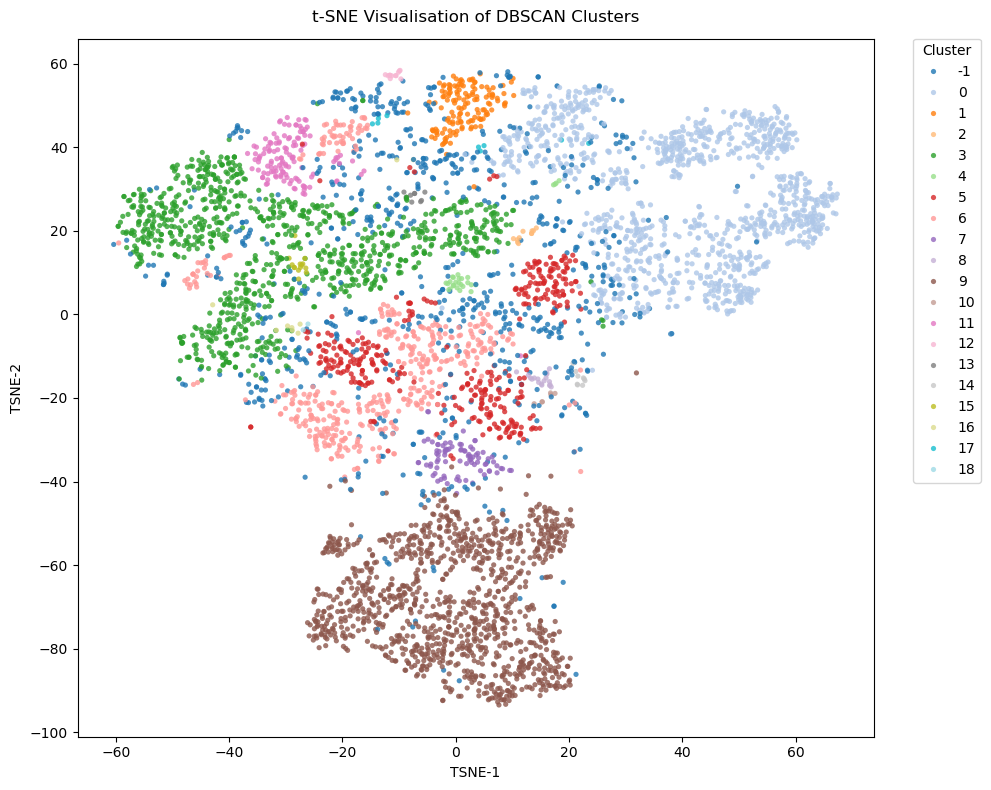

In [207]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data (use quantile-scaled or PCA features; same as you used before DBSCAN)
X = data_quantile   # or X_pca if you want

# Run t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=50,
    learning_rate=200,
    max_iter=2000,
    random_state=42
).set_output(transform="pandas")

tsne_df = tsne.fit_transform(X)

# Add DBSCAN cluster labels
tsne_df['cluster'] = songs_df['cluster_DBSCAN_umap']

# Plot
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=tsne_df,
    x='tsne0', y='tsne1',
    hue='cluster',
    palette='tab20',
    s=14, alpha=0.8, linewidth=0
)

ax.set_title("t-SNE Visualisation of DBSCAN Clusters", pad=12)
ax.set_xlabel("TSNE-1"); ax.set_ylabel("TSNE-2")

# Move legend outside the plot (so it’s not cluttered)
plt.legend(
    title="Cluster",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

In [ ]:
# Comparison

/var/folders/xn/tw0sz0nx6dv2wmn3xgpg0s0r0000gn/T/ipykernel_1107/763039718.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=min(3, len(g)), random_state=42))
/var/folders/xn/tw0sz0nx6dv2wmn3xgpg0s0r0000gn/T/ipykernel_1107/763039718.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=min(3, len(g)), random_state=42))


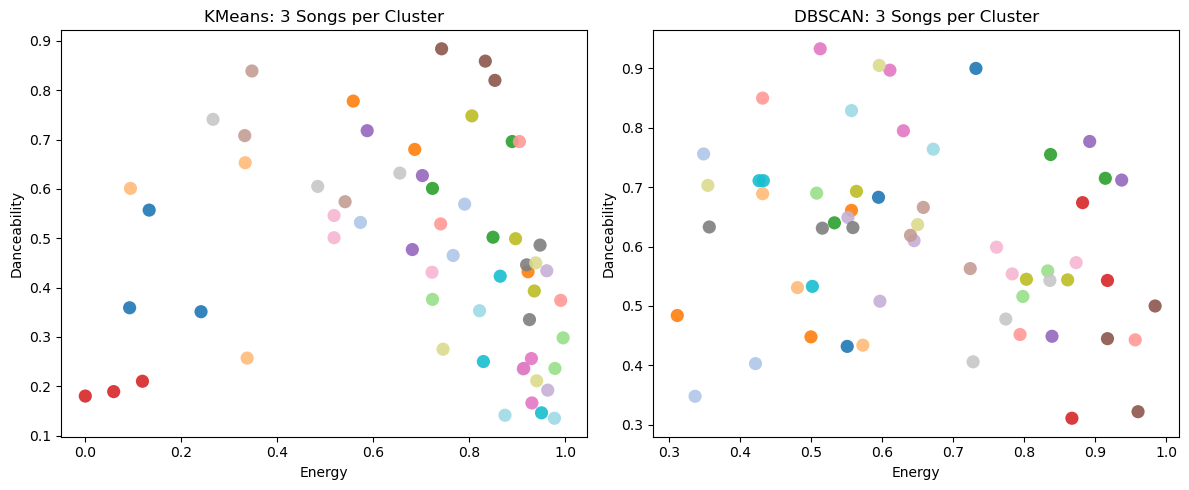

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ---------------------------
# 1) Attach cluster labels
# ---------------------------

# Example: fit KMeans (if not already done)
# adjust n_clusters if needed
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(data_quantile)   # or X_pca if you trained on PCA

# Copy dataframe and add cluster columns
songs_df = songs_df.copy()
songs_df['kmeans_cluster'] = kmeans.labels_          # KMeans labels
# DBSCAN labels should already be in this column:
# songs_df['cluster_DBSCAN_umap']

# ---------------------------
# 2) Sample 3 songs per cluster
# ---------------------------
x_feat, y_feat = "energy", "danceability"   # choose any 2 features

kmeans_sample = (
    songs_df.groupby('kmeans_cluster', group_keys=False)
            .apply(lambda g: g.sample(n=min(3, len(g)), random_state=42))
)

dbscan_sample = (
    songs_df.groupby('cluster_DBSCAN_umap', group_keys=False)
            .apply(lambda g: g.sample(n=min(3, len(g)), random_state=42))
)

# ---------------------------
# 3) Plot side-by-side scatter
# ---------------------------
plt.figure(figsize=(12, 5))

# --- KMeans ---
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    data=kmeans_sample, x=x_feat, y=y_feat,
    hue='kmeans_cluster', palette='tab20',
    s=90, alpha=0.9, linewidth=0
)
ax1.set_title("KMeans: 3 Songs per Cluster")
ax1.set_xlabel(x_feat.capitalize()); ax1.set_ylabel(y_feat.capitalize())
ax1.legend_.remove()

# --- DBSCAN ---
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    data=dbscan_sample, x=x_feat, y=y_feat,
    hue='cluster_DBSCAN_umap', palette='tab20',
    s=90, alpha=0.9, linewidth=0
)
ax2.set_title("DBSCAN: 3 Songs per Cluster")
ax2.set_xlabel(x_feat.capitalize()); ax2.set_ylabel(y_feat.capitalize())
ax2.legend_.remove()

plt.tight_layout()
plt.show()

In [211]:
import umap

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(data_quantile)

songs_df["umap1"] = embedding[:,0]
songs_df["umap2"] = embedding[:,1]

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


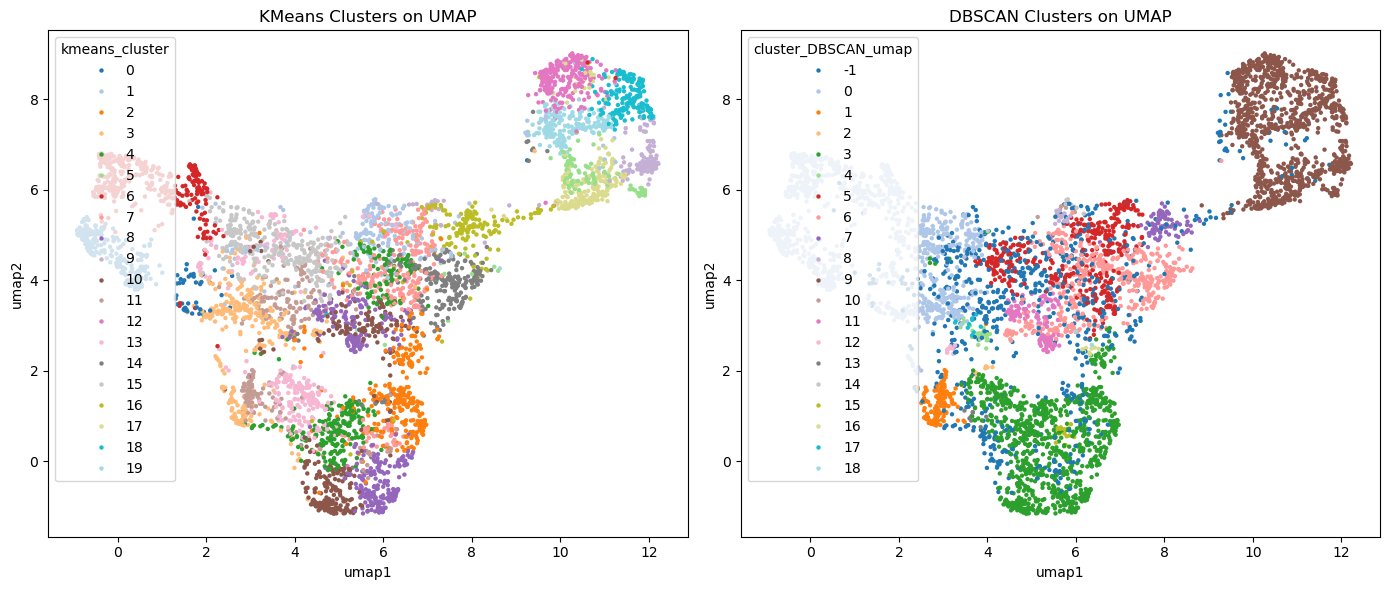

In [212]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --- KMeans ---
sns.scatterplot(
    data=songs_df, x="umap1", y="umap2",
    hue="kmeans_cluster", palette="tab20",
    s=10, linewidth=0, ax=axes[0]
)
axes[0].set_title("KMeans Clusters on UMAP")

# --- DBSCAN ---
sns.scatterplot(
    data=songs_df, x="umap1", y="umap2",
    hue="cluster_DBSCAN_umap", palette="tab20",
    s=10, linewidth=0, ax=axes[1]
)
axes[1].set_title("DBSCAN Clusters on UMAP")

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


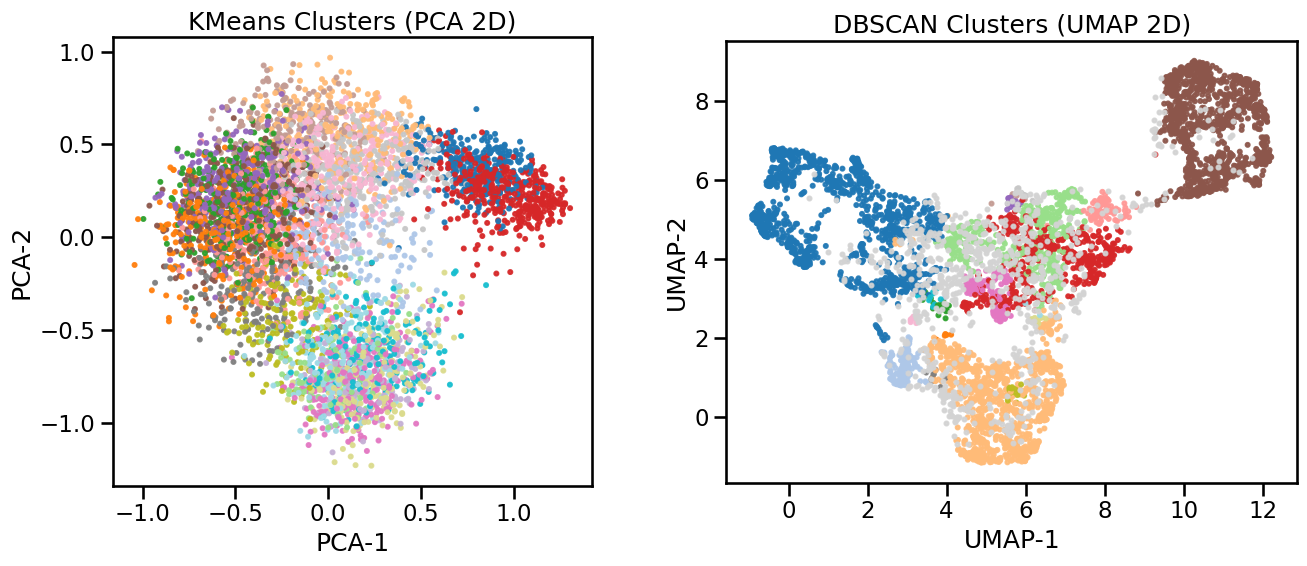

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap

# ---------- helpers ----------
def as_array(X):
    return np.asarray(getattr(X, "values", X))

# ---------- 1) embeddings (PCA for KMeans view, UMAP for DBSCAN view) ----------
Xq = as_array(data_quantile)          # quantile-scaled features aligned with songs_df

pca = PCA(n_components=2, random_state=42)
pca_2d = as_array(pca.fit_transform(Xq))          # ensure ndarray

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
umap_2d = as_array(reducer.fit_transform(Xq))     # ensure ndarray

assert len(songs_df) == pca_2d.shape[0] == umap_2d.shape[0], "Row counts must match."

# ---------- 2) attach to songs_df safely ----------
songs_df = songs_df.copy()
for col in ["pca1","pca2","umap1","umap2"]:
    if col in songs_df.columns:
        songs_df.drop(columns=col, inplace=True)

songs_df[["pca1","pca2"]] = pca_2d
songs_df[["umap1","umap2"]] = umap_2d

# ---------- 3) labels ----------
# KMeans labels (fit only if you don't already have them)
if "kmeans_cluster" not in songs_df.columns:
    kmeans = KMeans(n_clusters=20, n_init=20, random_state=42)
    kmeans.fit(Xq)                     # if your KMeans was trained on PCA: use pca_2d instead
    songs_df["kmeans_cluster"] = kmeans.labels_

# DBSCAN labels should already exist:
# songs_df["cluster_DBSCAN_umap"]

# ---------- 4) plots: plain 2D scatters ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KMeans (PCA space)
axes[0].scatter(
    songs_df["pca1"], songs_df["pca2"],
    c=songs_df["kmeans_cluster"], cmap="tab20", s=8, alpha=0.9
)
axes[0].set_title("KMeans Clusters (PCA 2D)")
axes[0].set_xlabel("PCA-1"); axes[0].set_ylabel("PCA-2")
axes[0].set_aspect("equal", adjustable="box")

# DBSCAN (UMAP space)
mask_out = songs_df["cluster_DBSCAN_umap"] == -1
mask_in  = ~mask_out
axes[1].scatter(
    songs_df.loc[mask_in, "umap1"], songs_df.loc[mask_in, "umap2"],
    c=songs_df.loc[mask_in, "cluster_DBSCAN_umap"], cmap="tab20", s=8, alpha=0.9
)
axes[1].scatter(
    songs_df.loc[mask_out, "umap1"], songs_df.loc[mask_out, "umap2"],
    c="lightgray", s=8, alpha=0.9, label="Outliers (-1)"
)
axes[1].set_title("DBSCAN Clusters (UMAP 2D)")
axes[1].set_xlabel("UMAP-1"); axes[1].set_ylabel("UMAP-2")
axes[1].set_aspect("equal", adjustable="box")

plt.tight_layout()
plt.show()

In [169]:
# --------

In [170]:
import numpy as np, pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

X = X_pca  # PCA data

def kdist_quantiles(X, k, qs=(0.30,0.40,0.50,0.60,0.70)):
    nn = NearestNeighbors(n_neighbors=k, metric="euclidean").fit(X)
    dists, _ = nn.kneighbors(X)
    k_d = np.sort(dists[:, -1])
    vals = np.quantile(k_d, qs)
    return [float(v) for v in vals]

results = []
best = None

for ms in [5, 6, 7, 8, 9, 10]:
    eps_list = kdist_quantiles(X, k=ms, qs=(0.30,0.40,0.50,0.60,0.70))
    for eps in eps_list:
        db = DBSCAN(eps=eps, min_samples=ms, metric="euclidean", n_jobs=-1)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_pct = float((labels == -1).mean() * 100)
        results.append({
            "min_samples": ms, "eps": round(eps, 6),
            "clusters": n_clusters, "noise%": round(noise_pct, 1)
        })
        # scoring: prefer ~20 clusters, <35% noise
        score = abs(n_clusters - 20) + max(0, noise_pct - 35)/10
        if best is None or score < best[0]:
            best = (score, ms, eps, labels, n_clusters, noise_pct)

df = pd.DataFrame(results)
print(df.sort_values(["clusters","noise%"], ascending=[False, True]).head(15))

# Attach best config
_, ms, eps, labels, ncl, nz = best
songs_df["cluster_DBSCAN"] = labels
print(f"\nChosen -> min_samples={ms}, eps={eps:.6f}, clusters={ncl}, noise%={nz:.1f}")

    min_samples       eps  clusters  noise%
0             5  0.292289        74    50.5
5             6  0.304696        51    47.9
1             5  0.308693        43    38.6
10            7  0.316473        33    45.7
2             5  0.325168        27    27.9
15            8  0.326030        26    43.8
6             6  0.322957        23    35.7
11            7  0.333370        21    32.4
3             5  0.340821        17    18.8
25           10  0.341792        17    40.2
20            9  0.334323        17    42.6
7             6  0.337959        16    24.5
8             6  0.354467        11    16.1
12            7  0.349800        11    21.6
16            8  0.343280        11    30.8

Chosen -> min_samples=7, eps=0.333370, clusters=21, noise%=32.4


In [171]:
from sklearn.cluster import DBSCAN
import pandas as pd

# DBSCAN with eps=0.5, min_samples=8
db = DBSCAN(eps=0.34, min_samples=7, metric="euclidean", n_jobs=-1)
labels = db.fit_predict(X_pca)

# Attach labels to your dataframe
songs_df["cluster_DBSCAN"] = labels

# Quick summary
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_pct = (labels == -1).mean() * 100

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {noise_pct:.1f}%")
print(pd.Series(labels).value_counts().sort_index())

Clusters found: 15
Noise points: 27.6%
-1     1443
 0     3686
 1       14
 2        7
 3        7
 4        6
 5        7
 6        7
 7        5
 8        6
 9        7
 10       3
 11       4
 12       6
 13      19
 14       8
Name: count, dtype: int64


In [172]:
# DBSCANon my PREPROCESSED data (QuantileTransformer -> PCA)

from sklearn.cluster import DBSCAN

# X_pca = your QuantileTransformer -> PCA matrix (built with random_state=42 in PCA)

dbscan = DBSCAN(
    eps=0.5,          # eps = 0.3 – 0.6
    min_samples=10,    # min_samples = 5, 10, 16, 20
    metric='euclidean',
    n_jobs=-1
)

labels = dbscan.fit_predict(X_pca)

songs_df = songs_df.copy()
songs_df['dbscan_cluster'] = labels  # -1 are noise points

In [173]:
import numpy as np

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_ratio = np.mean(labels == -1)

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {noise_ratio:.1%}")

Clusters found: 1
Noise points: 0.4%


In [174]:
# DBSCANon my PREPROCESSED data (QuantileTransformer -> PCA)

from sklearn.cluster import DBSCAN

# X_pca = your QuantileTransformer -> PCA matrix (built with random_state=42 in PCA)

dbscan = DBSCAN(
    eps=0.4,          # eps = 0.3 – 0.6
    min_samples=5,    # min_samples = 5, 10, 16, 20
    metric='euclidean',
    n_jobs=-1
)

labels = dbscan.fit_predict(X_pca)

songs_df = songs_df.copy()
songs_df['dbscan_cluster'] = labels  # -1 are noise points

In [175]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_ratio = np.mean(labels == -1)

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {noise_ratio:.1%}")

Clusters found: 2
Noise points: 3.6%


In [176]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(X_pca, songs_df['dbscan_cluster'])
print("Silhouette:", sil)

Silhouette: -0.037461636998755446


In [177]:
# A negative silhouette (-0.037) means:
	# •	Many songs are probably closer to another cluster than to their assigned cluster.
	# •	In practice: the clusters DBSCAN found aren’t well separated — they’re overlapping blobs.

In [178]:
# combine DBSCAN + KMeans
# 🔹 Benefits of combining
	# •	DBSCAN cleans up noise/outliers (songs that would just confuse KMeans).
	# •	KMeans organizes the main songs into consistent playlists.
	# •	Outliers can be handled separately (e.g., “miscellaneous” or “discoveries” playlist).

In [179]:
# Step 1. Run DBSCAN for outlier detection

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.45,          # tuned around elbow
    min_samples=10,    # 5–10 works well
    metric='euclidean',
    n_jobs=-1
)

labels_db = dbscan.fit_predict(X_pca)
songs_df['dbscan_outlier'] = (labels_db == -1)  # True if outlier
print("Outliers detected:", songs_df['dbscan_outlier'].sum())

Outliers detected: 84


In [180]:
# Step 2. Keep only the “normal” songs

inlier_mask = ~songs_df['dbscan_outlier']
X_inliers = X_pca[inlier_mask]

In [181]:
# Step 3. Run KMeans on inliers

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_inliers)

songs_df.loc[inlier_mask, 'playlist_cluster'] = labels_km
songs_df.loc[~inlier_mask, 'playlist_cluster'] = -1  # keep -1 for outliers

In [182]:
# Cluster the rest

from sklearn.cluster import KMeans

inlier_mask = ~songs_df['dbscan_outlier']
X_inliers = X_pca[inlier_mask]

kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_inliers)

# Store back into DataFrame
songs_df.loc[inlier_mask, 'playlist_cluster'] = labels_km
songs_df.loc[~inlier_mask, 'playlist_cluster'] = -1  # keep -1 for outliers

In [183]:
print(songs_df['playlist_cluster'].value_counts().sort_index())

playlist_cluster
-1.0      84
 0.0     156
 1.0     321
 2.0     325
 3.0     263
 4.0     211
 5.0     213
 6.0     173
 7.0     269
 8.0     303
 9.0     339
 10.0    289
 11.0    298
 12.0    329
 13.0    292
 14.0    276
 15.0    216
 16.0    172
 17.0    244
 18.0    172
 19.0    290
Name: count, dtype: int64


In [184]:
# musical interpretation

In [185]:
# --- Step 1. Pick features that describe “mood”
features = ['danceability','energy','loudness','speechiness','acousticness',
            'instrumentalness','liveness','valence','tempo','duration_ms']

# (optional) ensure features are numeric
songs_df[features] = songs_df[features].apply(pd.to_numeric, errors='coerce')

In [186]:
# --- Step 2. Get cluster averages (exclude outliers = -1)
mask_inliers = songs_df['playlist_cluster'] != -1
cluster_summary = (
    songs_df.loc[mask_inliers]
            .groupby('playlist_cluster')[features]
            .mean()
)

In [187]:
# --- Step 3. Normalize for easier interpretation (z-score across clusters)

z = (cluster_summary - cluster_summary.mean()) / cluster_summary.std(ddof=0)
z = z.replace([np.inf, -np.inf], 0).fillna(0)

In [188]:
# --- Step 4. Auto-generate descriptive tags

def describe_cluster(r):
    tags=[]
    if r['energy'] > 1: tags.append('Energetic')
    elif r['energy'] < -1: tags.append('Chill')

    if r['danceability'] > 1: tags.append('Danceable')
    elif r['danceability'] < -1: tags.append('Not Dancey')

    if r['valence'] > 1: tags.append('Happy')
    elif r['valence'] < -1: tags.append('Dark/Moody')

    if r['acousticness'] > 1: tags.append('Acoustic')
    elif r['acousticness'] < -1: tags.append('Electronic')

    if r['instrumentalness'] > 1: tags.append('Instrumental')
    if r['speechiness'] > 1: tags.append('Spoken/Rap')

    if r['tempo'] > 1: tags.append('Fast')
    elif r['tempo'] < -1: tags.append('Slow')

    if r['duration_ms'] > 1: tags.append('Long Tracks')
    elif r['duration_ms'] < -1: tags.append('Short Tracks')

    return " / ".join(tags) if tags else "Mixed"

cluster_labels = z.apply(describe_cluster, axis=1)


In [189]:
# --- Step 5. Attach names back to your songs
songs_df['playlist_name'] = songs_df['playlist_cluster'].map(cluster_labels)
songs_df.loc[~mask_inliers, 'playlist_name'] = 'Outliers'  # name the -1s

In [190]:
# make names unique by adding the top distinctive feature
top_feat = z.abs().idxmax(axis=1)  # most extreme feature per cluster
unique_names = cluster_labels + " | " + top_feat
songs_df['playlist_name'] = songs_df['playlist_cluster'].map(unique_names)
songs_df.loc[~mask_inliers, 'playlist_name'] = 'Outliers'

In [191]:
print(songs_df.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'cluster_KMeans', 'cluster_DBSCAN', 'dbscan_cluster',
       'cluster_DBSCAN_umap', 'dbscan_outlier', 'playlist_cluster',
       'playlist_name'],
      dtype='object')


In [192]:
songs_df.head(10)

danceability  energy  \
name                                                                       
Se Eu Quiser Falar Com Deus                    ...         0.658  0.2590   
Saudade De Bahia                               ...         0.742  0.3990   
Canta Canta, Minha Gente                       ...         0.851  0.7300   
Mulher Eu Sei                                  ...         0.705  0.0502   
Rosa Morena                                    ...         0.651  0.1190   
Desafinado                                     ...         0.466  0.1460   
Madalena                                       ...         0.675  0.2070   
O Meu Amor É Glòria                            ...         0.504  0.7330   
Brigas Nunca Mais                              ...         0.694  0.5460   
Previsao                                       ...         0.674  0.8640   

                                                    loudness  speechiness  \
name                                                                        
Se Eu Quiser Falar Com Deus                    ...   -13.141       0.0705   
Saudade De Bahia                               ...   -12.646       0.0346   
Canta Canta, Minha Gente                       ...   -11.048       0.3470   
Mulher Eu Sei                                  ...   -18.115       0.0471   
Rosa Morena                                    ...   -19.807       0.0380   
Desafinado                                     ...   -17.500       0.0649   
Madalena                                       ...   -13.820       0.0545   
O Meu Amor É Glòria                            ...   -10.720       0.3890   
Brigas Nunca Mais                              ...   -11.452       0.0400   
Previsao                                       ...    -7.971       0.0382   

                                                    acousticness  \
name                                                               
Se Eu Quiser Falar Com Deus                    ...         0.694   
Saudade De Bahia                               ...         0.217   
Canta Canta, Minha Gente                       ...         0.453   
Mulher Eu Sei                                  ...         0.879   
Rosa Morena                                    ...         0.916   
Desafinado                                     ...         0.931   
Madalena                                       ...         0.963   
O Meu Amor É Glòria                            ...         0.696   
Brigas Nunca Mais                              ...         0.398   
Previsao                                       ...         0.641   

                                                    instrumentalness  \
name                                                                   
Se Eu Quiser Falar Com Deus                    ...          0.000059   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000063   
Mulher Eu Sei                                  ...          0.000041   
Rosa Morena                                    ...          0.000343   
Desafinado                                     ...          0.154000   
Madalena                                       ...          0.414000   
O Meu Amor É Glòria                            ...          0.000056   
Brigas Nunca Mais                              ...          0.076000   
Previsao                                       ...          0.358000   

                                                    liveness  valence  \
name                                                                    
Se Eu Quiser Falar Com Deus                    ...     0.975    0.306   
Saudade De Bahia                               ...     0.107    0.693   
Canta Canta, Minha Gente                       ...     0.124    0.905   
Mulher Eu Sei                                  ...     0.386    0.524   
Rosa Morena                                    ...     0.104    0.402   
Desafinado           

#### songs_df.groupby(['playlist_cluster','playlist_name']).size()

In [193]:
songs_df[songs_df['playlist_cluster'] == 3].head(20)

danceability   energy  \
name                                                                        
OBI                                            ...         0.566  0.31400   
Coracao Vagabundo                              ...         0.584  0.05060   
Apelo                                          ...         0.531  0.15300   
Violão Vadio                                   ...         0.364  0.08840   
Adeus Até Mais Ver                             ...         0.544  0.23900   
Lindeza                                        ...         0.524  0.10200   
Paranoid Android                               ...         0.385  0.57300   
How to Disappear Completely                    ...         0.168  0.30200   
Sigur 1 (Untitled)                             ...         0.294  0.12700   
Zamba del Carnaval                             ...         0.520  0.14000   
La Gent Així                                   ...         0.338  0.23200   
Bridge Over Troubled Water                     ...         0.149  0.20600   
I Will Always Love You                         ...         0.332  0.21400   
Endless Love                                   ...         0.483  0.26800   
I. Adagio sostenuto                            ...         0.141  0.00123   
Prelude in B minor, BWV 855a (Arr. by Alexander...         0.182  0.03770   
To the Sky (Moderate)                          ...         0.315  0.07780   
Adagio for Strings and Organ                   ...         0.159  0.27900   
Bylur                                          ...         0.184  0.20700   
You Say                                        ...         0.272  0.32300   

                                                    loudness  speechiness  \
name                                                                        
OBI                                            ...   -17.921       0.0761   
Coracao Vagabundo                              ...   -20.168       0.0647   
Apelo                                          ...   -12.022       0.0356   
Violão Vadio                                   ...   -21.309       0.0410   
Adeus Até Mais Ver                             ...   -15.386       0.0290   
Lindeza                                        ...   -19.062       0.0382   
Paranoid Android                               ...   -13.027       0.0449   
How to Disappear Completely                    ...   -11.645       0.0344   
Sigur 1 (Untitled)                             ...   -13.916       0.0332   
Zamba del Carnaval                             ...   -19.627       0.0554   
La Gent Així                                   ...   -15.194       0.0274   
Bridge Over Troubled Water                     ...   -13.888       0.0323   
I Will Always Love You                         ...   -12.518       0.0349   
Endless Love                                   ...   -11.809       0.0257   
I. Adagio sostenuto                            ...   -43.851       0.0429   
Prelude in B minor, BWV 855a (Arr. by Alexander...   -33.748       0.0391   
To the Sky (Moderate)                          ...   -19.953       0.0443   
Adagio for Strings and Organ                   ...   -13.561       0.0371   
Bylur                                          ...   -17.119       0.0330   
You Say                                        ...   -12.932       0.0339   

                                                    acousticness  \
name                                                               
OBI                                            ...         0.756   
Coracao Vagabundo                              ...         0.901   
Apelo                                          ...         0.923   
Violão Vadio                                   ...         0.927   
Adeus Até Mais Ver                             ...         0.874   
Lindeza                                        ...         0.885   
Paranoid Android                               ...         0.669   
How to Disappear Completely                    ...

In [194]:
songs_df[songs_df['playlist_cluster'] == -1].head(20)

danceability  energy  \
name                                                                       
Don't Stop the Carnival                        ...         0.481   0.525   
Karoliina Kaunis                               ...         0.753   0.215   
O Pato (The Duck) - Live At Carnegie Hall/1964 ...         0.621   0.180   
Samba Da Minha Terra - Live At Carnegie Hall/19...         0.576   0.322   
Berekerê - Voice                               ...         0.434   0.573   
Máquina de Ritmo - Ao Vivo                     ...         0.587   0.296   
Back In Bahia (Ao Vivo)                        ...         0.667   0.457   
Sabor Colorido / Moça Bonita                   ...         0.517   0.226   
Berekerê - Voice                               ...         0.434   0.573   
Maria Bethânia                                 ...         0.621   0.471   
Different Pulses                               ...         0.635   0.530   
Limit To Your Love                             ...         0.794   0.271   
Ordinary Girls                                 ...         0.205   0.869   
Swinging London                                ...         0.555   0.717   
Waterfall                                      ...         0.283   0.899   
Girl                                           ...         0.511   0.610   
Unbroken, Unshaven                             ...         0.611   0.931   
Gone                                           ...         0.386   0.995   
Inspector Norse                                ...         0.912   0.781   
All I Want Is to Be Your Girl                  ...         0.468   0.964   

                                                    loudness  speechiness  \
name                                                                        
Don't Stop the Carnival                        ...   -11.228       0.0590   
Karoliina Kaunis                               ...   -15.671       0.2930   
O Pato (The Duck) - Live At Carnegie Hall/1964 ...   -23.524       0.0619   
Samba Da Minha Terra - Live At Carnegie Hall/19...   -23.134       0.1780   
Berekerê - Voice                               ...   -11.203       0.0666   
Máquina de Ritmo - Ao Vivo                     ...   -16.507       0.2240   
Back In Bahia (Ao Vivo)                        ...   -13.166       0.2950   
Sabor Colorido / Moça Bonita                   ...   -17.795       0.0581   
Berekerê - Voice                               ...   -11.203       0.0666   
Maria Bethânia                                 ...   -13.784       0.2020   
Different Pulses                               ...    -5.992       0.0238   
Limit To Your Love                             ...   -11.225       0.1450   
Ordinary Girls                                 ...    -7.433       0.0445   
Swinging London                                ...   -10.212       0.0676   
Waterfall                                      ...    -1.325       0.0383   
Girl                                           ...   -11.291       0.2430   
Unbroken, Unshaven                             ...    -9.873       0.1170   
Gone                                           ...     0.788       0.0873   
Inspector Norse                                ...    -7.018       0.0444   
All I Want Is to Be Your Girl                  ...    -3.061       0.0760   

                                                    acousticness  \
name                                                               
Don't Stop the Carnival                        ...      0.568000   
Karoliina Kaunis                               ...      0.618000   
O Pato (The Duck) - Live At Carnegie Hall/1964 ...      0.875000   
Samba Da Minha Terra - Live At Carnegie Hall/19...      0.879000   
Berekerê - Voice                               ...      0.830000   
Máquina de Ritmo - Ao Vivo                     ...      0.879000   
Back In Bahia (Ao Vivo)                        ...      0.712000   
Sabor Colorido / Moça Bonita                   ...      0.808000   
Bere

In [195]:
# Build a summary DataFrame with cluster size and descriptive name
playlist_summary = (
    songs_df.groupby(['playlist_cluster', 'playlist_name'])
            .size()
            .reset_index(name='count')
            .sort_values('playlist_cluster')
)

# Pretty print
print(playlist_summary.to_string(index=False))

 playlist_cluster                                                                                playlist_name  count
             -1.0                                                                                     Outliers     84
              0.0                               Chill / Dark/Moody / Acoustic / Instrumental / Fast | loudness    156
              1.0                                                                         Energetic | liveness    321
              2.0                                                                             Happy | liveness    325
              3.0 Chill / Not Dancey / Dark/Moody / Acoustic / Instrumental / Slow / Long Tracks | duration_ms    263
              4.0                                                                              Happy | valence    211
              5.0                                                                                 Slow | tempo    213
              6.0                                       

In [196]:
top_feat = z.abs().idxmax(axis=1)       # most extreme feature per cluster
# Modern way: use .to_numpy with advanced indexing
top_val = z.to_numpy()[np.arange(len(z)), z.abs().values.argmax(axis=1)]

In [197]:
unique_names = cluster_labels + " | " + top_feat
songs_df['playlist_name'] = songs_df['playlist_cluster'].map(unique_names)
songs_df.loc[~mask_inliers, 'playlist_name'] = 'Outliers'

In [198]:
# Build a summary DataFrame with cluster size and descriptive name
playlist_summary = (
    songs_df.groupby(['playlist_cluster', 'playlist_name'])
            .size()
            .reset_index(name='count')
            .sort_values('playlist_cluster')
)

# Pretty print
print(playlist_summary.to_string(index=False))

 playlist_cluster                                                                                playlist_name  count
             -1.0                                                                                     Outliers     84
              0.0                               Chill / Dark/Moody / Acoustic / Instrumental / Fast | loudness    156
              1.0                                                                         Energetic | liveness    321
              2.0                                                                             Happy | liveness    325
              3.0 Chill / Not Dancey / Dark/Moody / Acoustic / Instrumental / Slow / Long Tracks | duration_ms    263
              4.0                                                                              Happy | valence    211
              5.0                                                                                 Slow | tempo    213
              6.0                                       

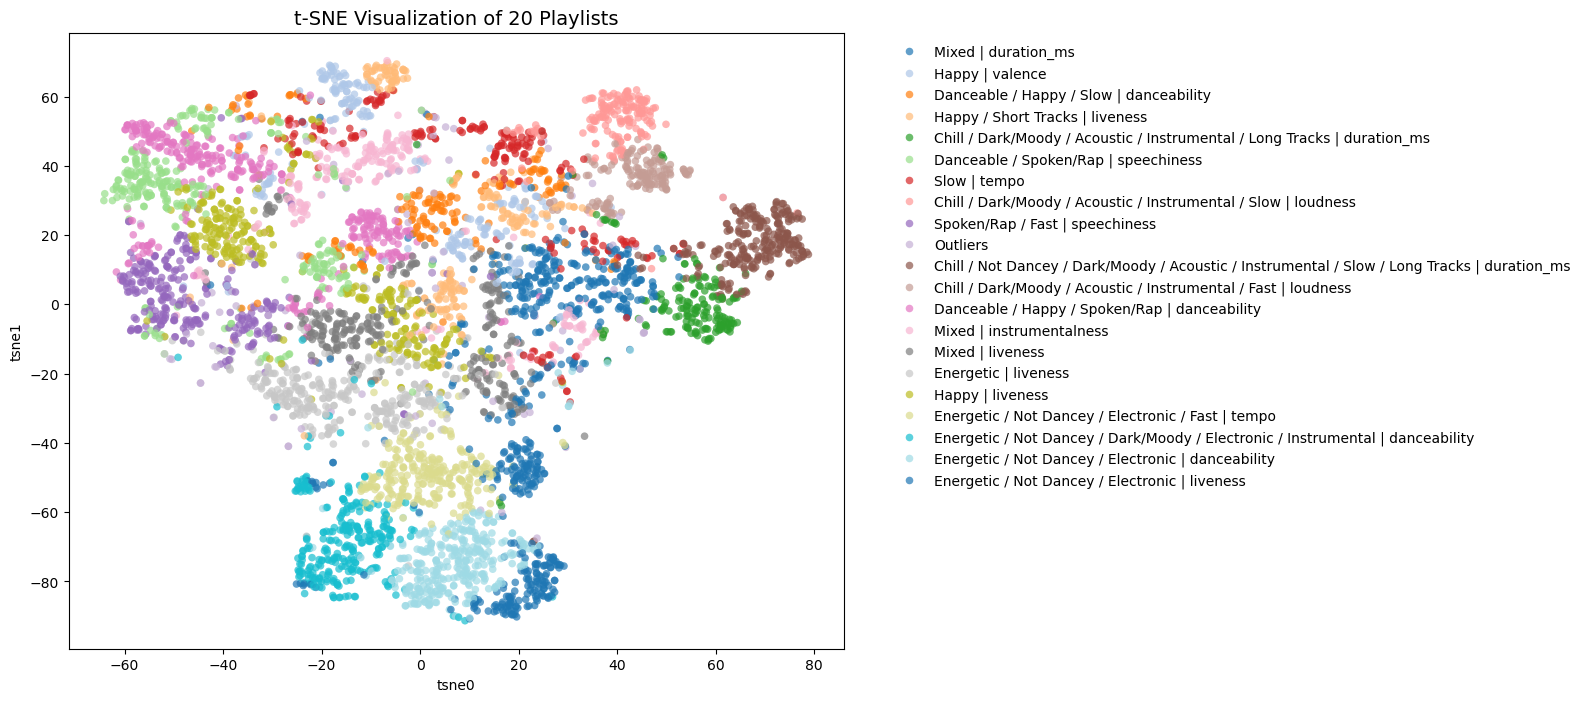

In [199]:
# t-SNE / UMAP scatter plot

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Run t-SNE on your PCA data
tsne = TSNE(
    n_components=2,
    perplexity=30,       # works well for 5k+ points
    learning_rate=200,
    max_iter=1000,
    random_state=42
).fit_transform(X_pca)

# Build a DataFrame for plotting
tsne_df = pd.DataFrame(tsne, columns=['tsne0','tsne1'], index=songs_df.index)
tsne_df['playlist_cluster'] = songs_df['playlist_cluster']
tsne_df['playlist_name'] = songs_df['playlist_name']

# Scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=tsne_df,
    x='tsne0', y='tsne1',
    hue='playlist_name',
    palette='tab20',
    s=30, alpha=0.7, linewidth=0
)
plt.title("t-SNE Visualization of 20 Playlists", fontsize=14)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', frameon=False)
plt.show()